In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [213]:
 import warnings
 warnings.simplefilter('ignore')

#### LOADING THE DATASET

In [214]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [215]:
# The Shape of the loaded dataset
df.shape

(986, 11)

In [216]:
# Retrieving the columns of the dataset
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [217]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [218]:
 # Retreiving the unique entries count present in each column
for i in df.columns:
    print(f"Unique entries for column {i} = {df[i].nunique()}" )

Unique entries for column Age = 49
Unique entries for column Diabetes = 2
Unique entries for column BloodPressureProblems = 2
Unique entries for column AnyTransplants = 2
Unique entries for column AnyChronicDiseases = 2
Unique entries for column Height = 44
Unique entries for column Weight = 74
Unique entries for column KnownAllergies = 2
Unique entries for column HistoryOfCancerInFamily = 2
Unique entries for column NumberOfMajorSurgeries = 4
Unique entries for column PremiumPrice = 24


In [219]:
 # Checking if the dataset is having any missing values.
print(np.any(df.isnull()))
# Retrieving the count of missing values from each column.
 df.isnull().sum()

False


Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [220]:
# Description of the dataset.
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [221]:
# Adding new feature calculating the BMI from given height and weight
df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2)

In [222]:
# Adding new feature BMI Category classifying person into Underweight, Normal and Obese
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

In [223]:
df["BMI_Category"] = df["BMI"].apply(classify_bmi)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Category
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obese


In [224]:
# Defining age bins and labels
bins = [17, 25, 35, 45, 55, 66]
labels = ['18–25', '26–35', '36–45', '46–55', '56–66']

In [225]:
# Apply binning
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)
# Preview the changes
df[["Age", "Age_Group"]].head(10)

,Age,Age_Group
0,45,36–45
1,60,56–66
2,36,36–45
3,52,46–55
4,38,36–45
5,30,26–35
6,33,26–35
7,23,18–25
8,48,46–55
9,38,36–45


In [226]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Category,Age_Group
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal,36–45
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal,56–66
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal,36–45
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Overweight,46–55
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obese,36–45


In [227]:
df["Health_Risk_Flag"] = df[[
    "Diabetes", "BloodPressureProblems", "AnyChronicDiseases", "AnyTransplants"
]].any(axis=1).astype(int)


In [228]:
def surgery_group(surgeries):
    if surgeries == 0:
        return "None"
    elif surgeries == 1:
        return "Mild"
    elif surgeries == 2:
        return "Moderate"
    else:
        return "Severe"

In [229]:
df["Surgery_Severity"] = df["NumberOfMajorSurgeries"].apply(surgery_group)

In [230]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Category,Age_Group,Health_Risk_Flag,Surgery_Severity
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal,36–45,0,None
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal,56–66,1,None
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal,36–45,1,Mild
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Overweight,46–55,1,Moderate
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obese,36–45,1,Mild


#### UNIVARIATE ANALYSIS

In [231]:
# List of numerical columns 
numerical_cols = [
    "Age", "BMI", "Weight", "Height", "PremiumPrice","NumberOfMajorSurgeries"]

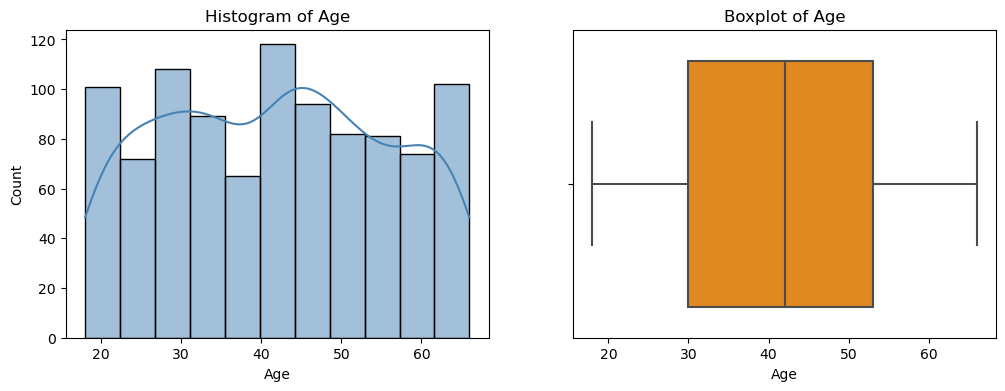

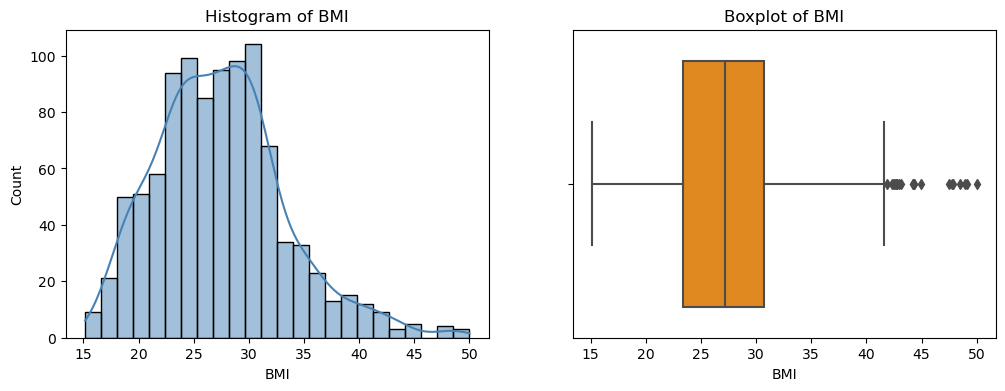

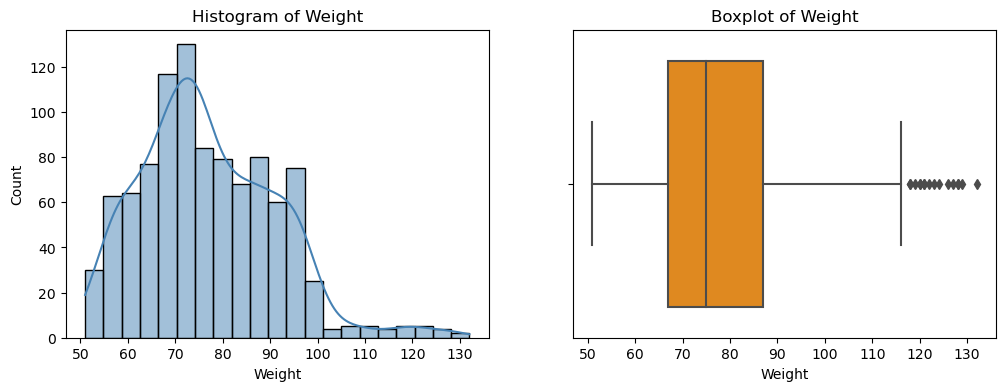

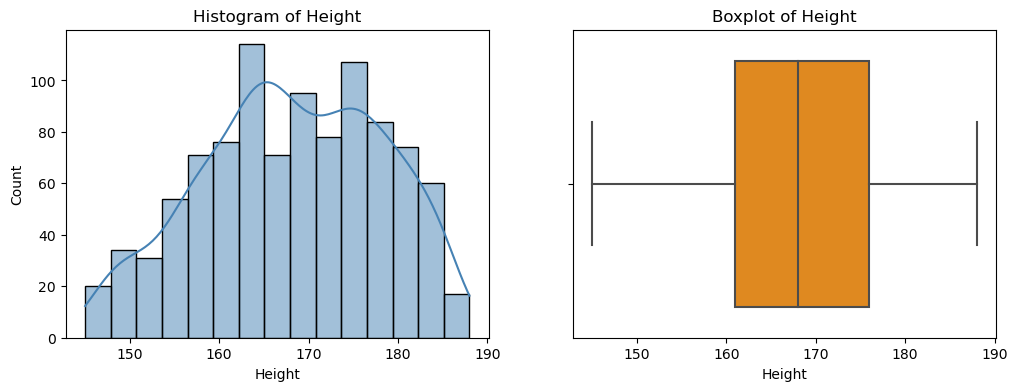

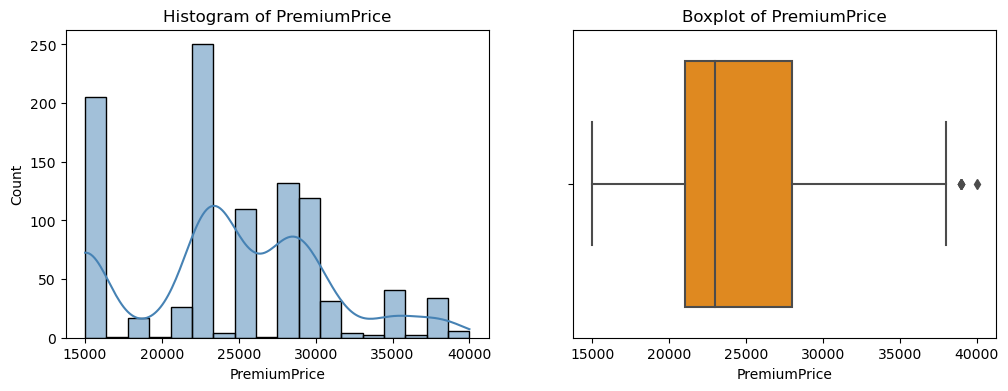

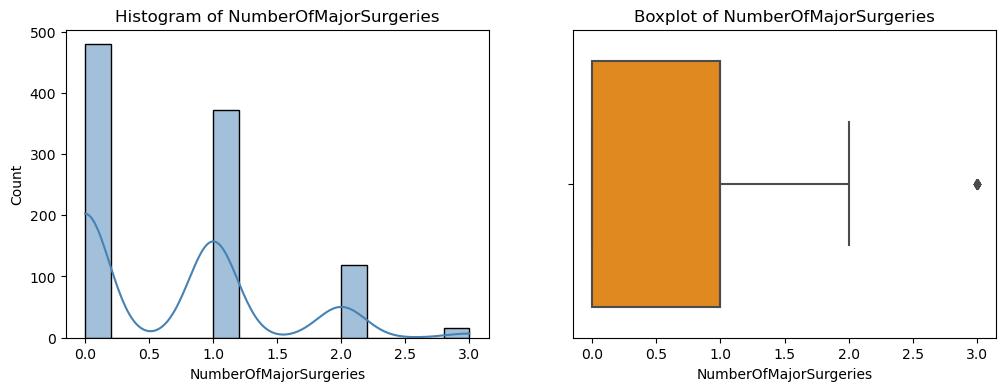

In [232]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=axes[0],color="steelblue")
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)

    sns.boxplot(x=df[col], ax=axes[1],color="darkorange")
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    #fig.tight_layout()

In [233]:
binary_cols = [
    "Diabetes", "BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases",
    "KnownAllergies", "HistoryOfCancerInFamily", "Health_Risk_Flag"
]

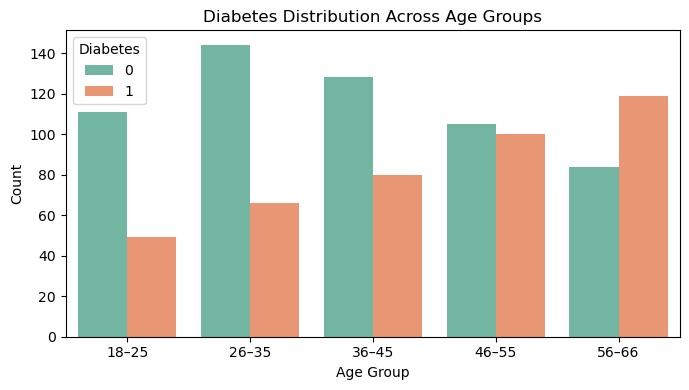

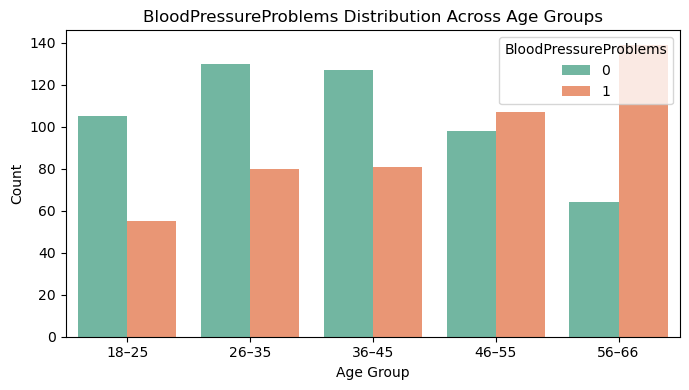

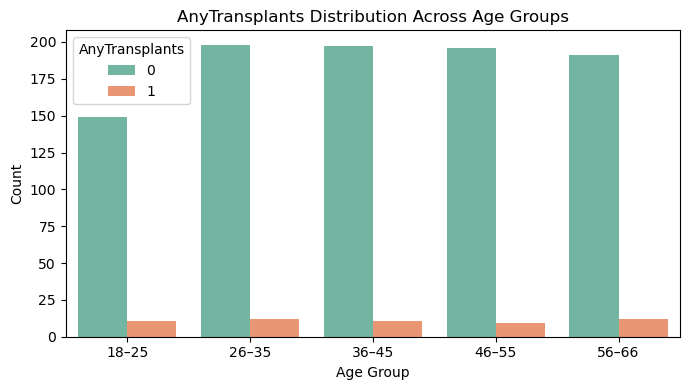

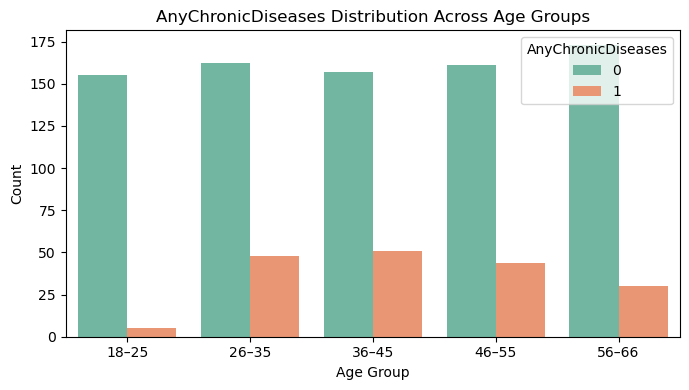

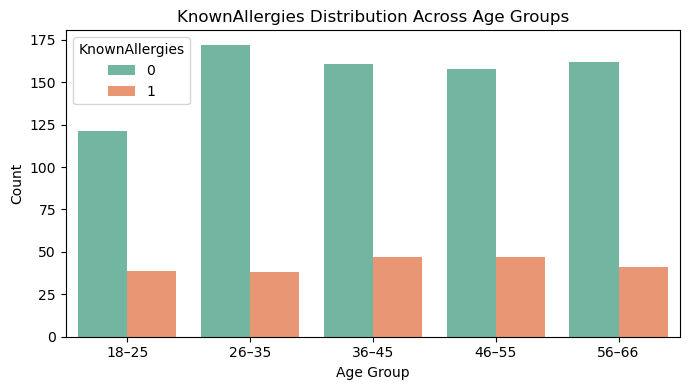

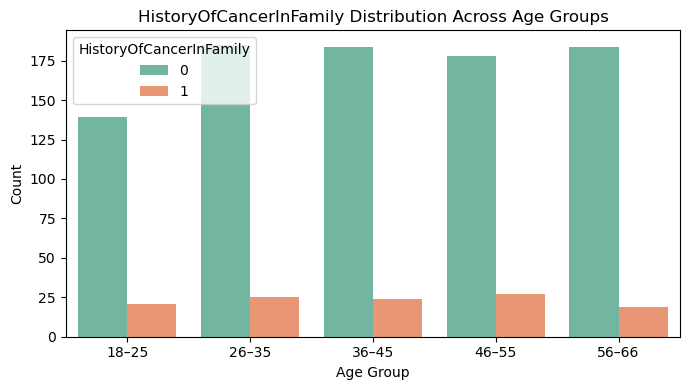

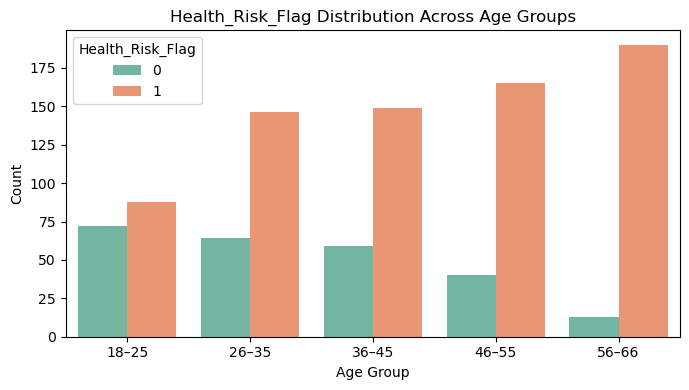

In [234]:
for col in binary_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x="Age_Group", hue=col, palette="Set2")
    plt.title(f'{col} Distribution Across Age Groups')
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

#### BIVARIATE ANALYSIS

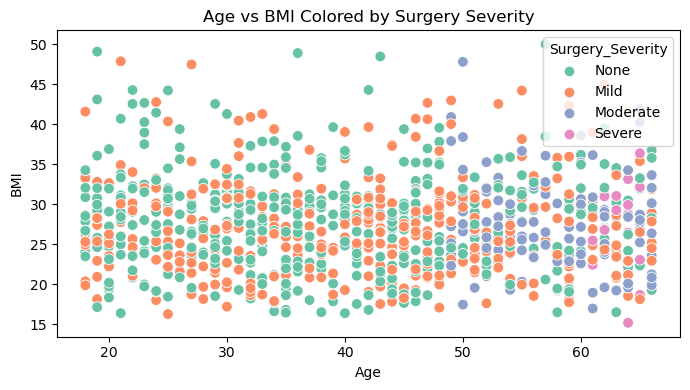

In [235]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x="Age", y="BMI", hue="Surgery_Severity", palette="Set2", s=60)
plt.title("Age vs BMI Colored by Surgery Severity")
plt.tight_layout()
plt.show()

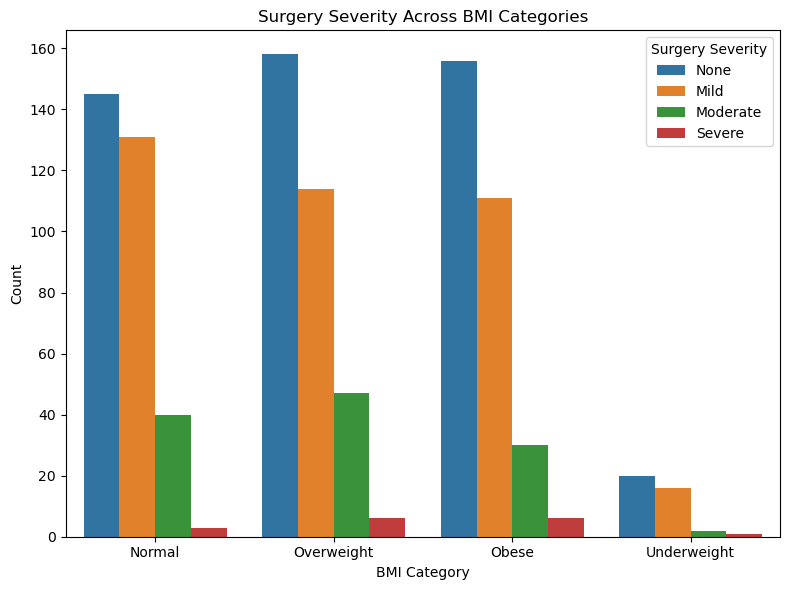

In [236]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="BMI_Category", hue="Surgery_Severity")
plt.title("Surgery Severity Across BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.legend(title="Surgery Severity")
plt.tight_layout()
plt.show()

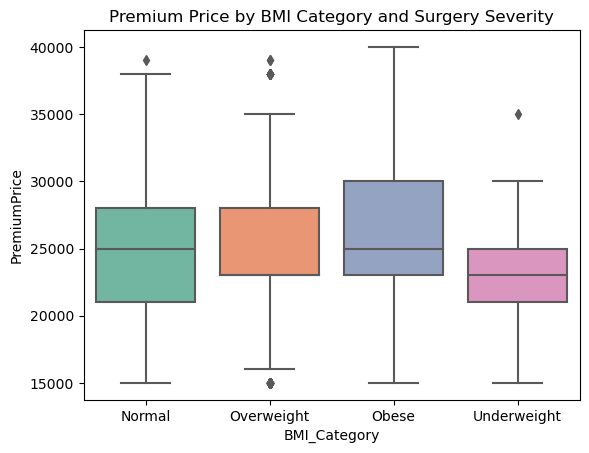

In [237]:
sns.boxplot(data=df, x="BMI_Category", y="PremiumPrice", palette="Set2")
plt.title("Premium Price by BMI Category and Surgery Severity")
plt.show()

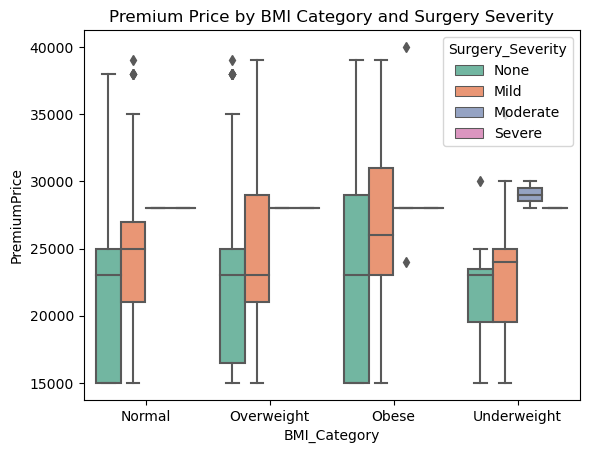

In [238]:
sns.boxplot(data=df, x="BMI_Category", y="PremiumPrice",hue = "Surgery_Severity", palette="Set2")
plt.title("Premium Price by BMI Category and Surgery Severity")
plt.show()

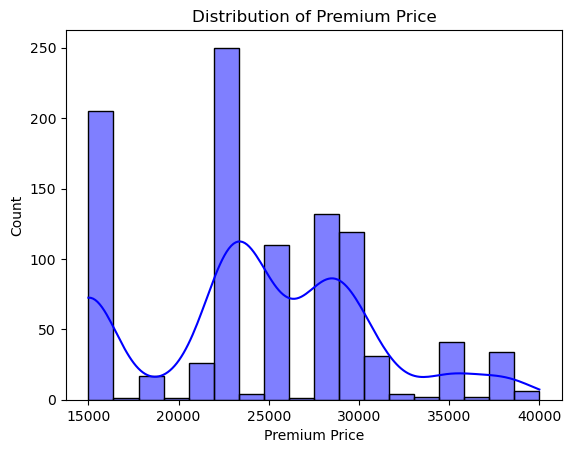

In [239]:
sns.histplot(df["PremiumPrice"], kde=True, color="blue")
plt.title("Distribution of Premium Price")
plt.xlabel("Premium Price")
plt.ylabel("Count")
plt.show()

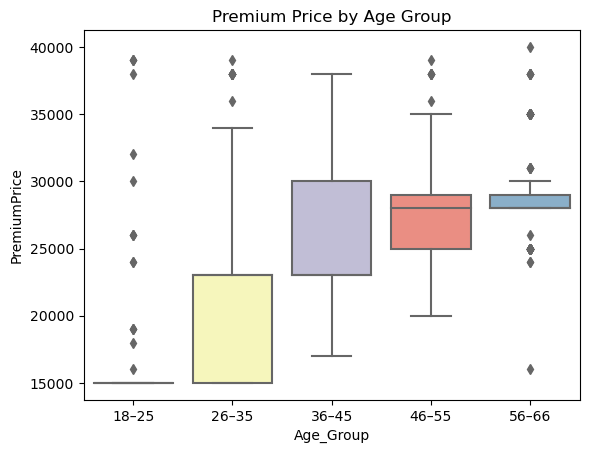

In [240]:
sns.boxplot(data=df, x="Age_Group", y="PremiumPrice", palette="Set3")
plt.title("Premium Price by Age Group")
plt.show()

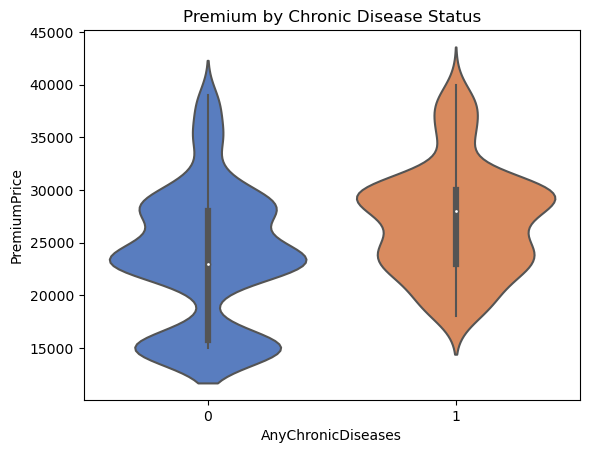

In [241]:
sns.violinplot(data=df, x="AnyChronicDiseases", y="PremiumPrice", palette="muted")
plt.title("Premium by Chronic Disease Status")
plt.show()

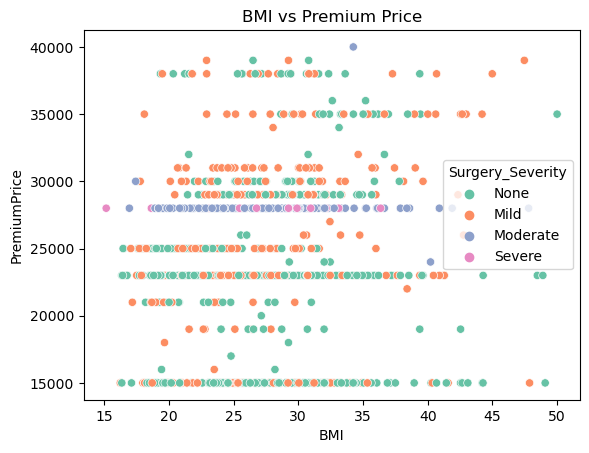

In [242]:
sns.scatterplot(data=df, x="BMI", y="PremiumPrice", hue="Surgery_Severity", palette="Set2")
plt.title("BMI vs Premium Price")
plt.show()

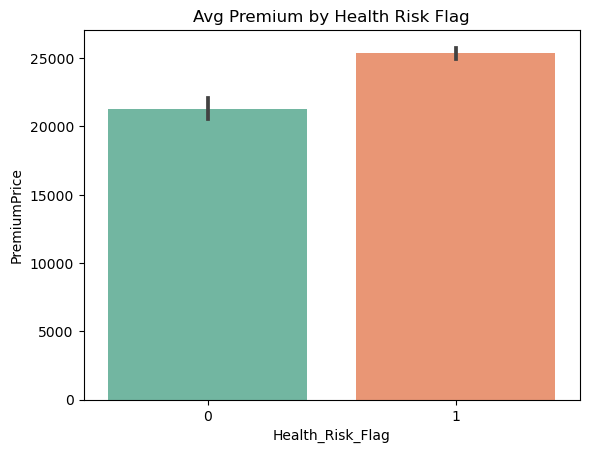

In [243]:
sns.barplot(data=df, x="Health_Risk_Flag", y="PremiumPrice", estimator="mean", palette="Set2")
plt.title("Avg Premium by Health Risk Flag")
plt.show()

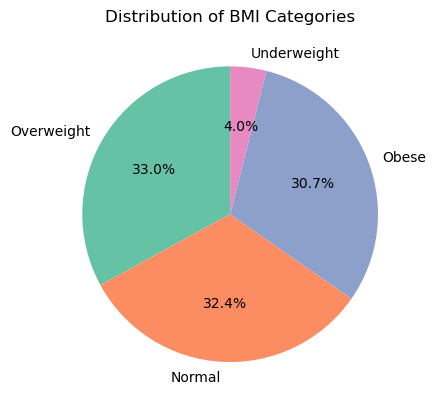

In [244]:
df["BMI_Category"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                           colors=sns.color_palette("Set2"))
plt.title("Distribution of BMI Categories")
plt.ylabel("")
plt.show()

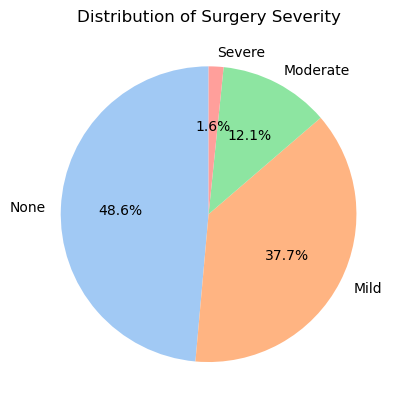

In [245]:
df["Surgery_Severity"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                               colors=sns.color_palette("pastel"))
plt.title("Distribution of Surgery Severity")
plt.ylabel("")
plt.show()

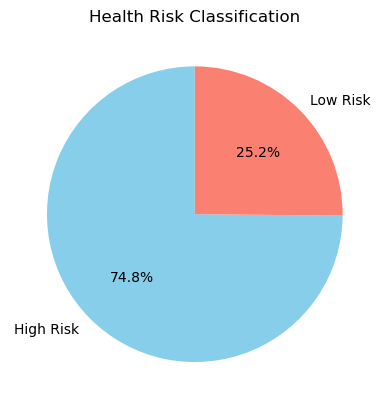

In [246]:
df["Health_Risk_Flag"].map({0: "Low Risk", 1: "High Risk"}).value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=["skyblue", "salmon"])
plt.title("Health Risk Classification")
plt.ylabel("")
plt.show()

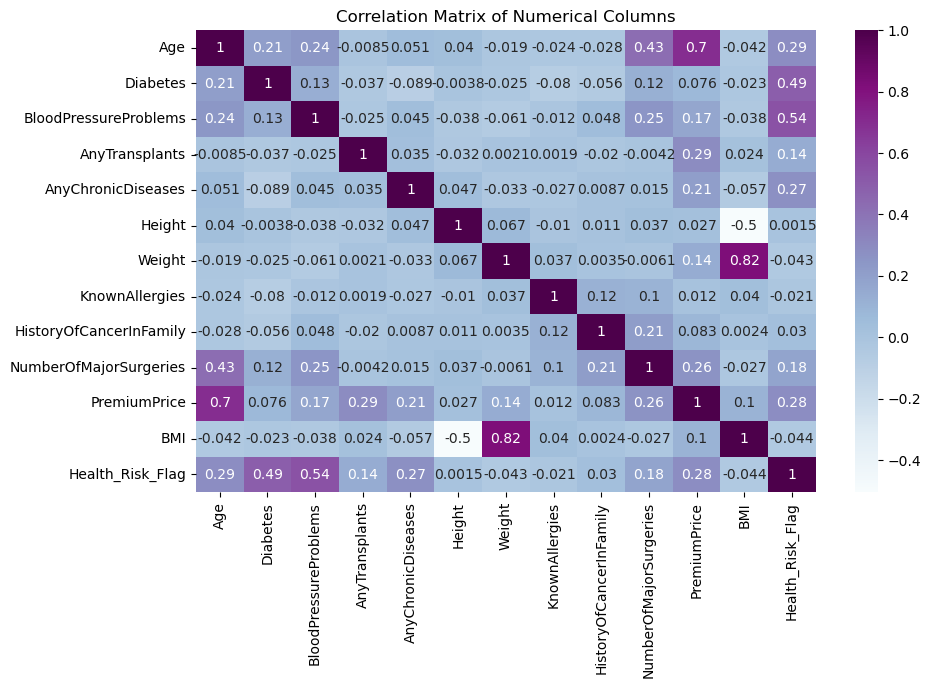

In [247]:
 numerical_columns = df.select_dtypes(include=['float64', 'int64','int32'])
 # Compute the correlation matrix
 correlation_matrix = numerical_columns.corr()
 plt.figure(figsize=(10,6))
 # Visualize the correlation matrix as a heatmap
 sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
 plt.title("Correlation Matrix of Numerical Columns")
 plt.show()

In [248]:
## Checking for Correlated features.
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [249]:
correlated_features

{'BMI'}

In [250]:
# Extracting correlations with PremiumPrice and sorting them by absolute value
premium_corr = correlation_matrix["PremiumPrice"].drop("PremiumPrice")
premium_corr_sorted = premium_corr.reindex(premium_corr.abs().sort_values(ascending=False).index)

# Preparing a new dataframe for storing the features and respective correlation value
correlation_summary = premium_corr_sorted.reset_index()
correlation_summary.columns = ["Feature", "Correlation_with_PremiumPrice"]

correlation_summary

,Feature,Correlation_with_PremiumPrice
0,Age,0.697540
1,AnyTransplants,0.289056
2,Health_Risk_Flag,0.283904
3,NumberOfMajorSurgeries,0.264250
4,AnyChronicDiseases,0.208610
5,BloodPressureProblems,0.167097
6,Weight,0.141507
7,BMI,0.103812
8,HistoryOfCancerInFamily,0.083139
9,Diabetes,0.076209


### 📊 Feature: `Age`

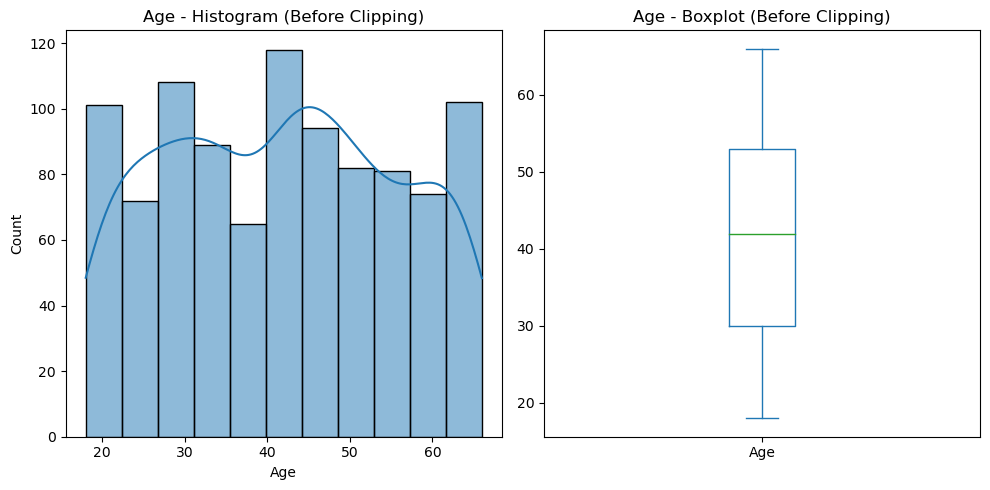

### 📊 Feature: `BMI`

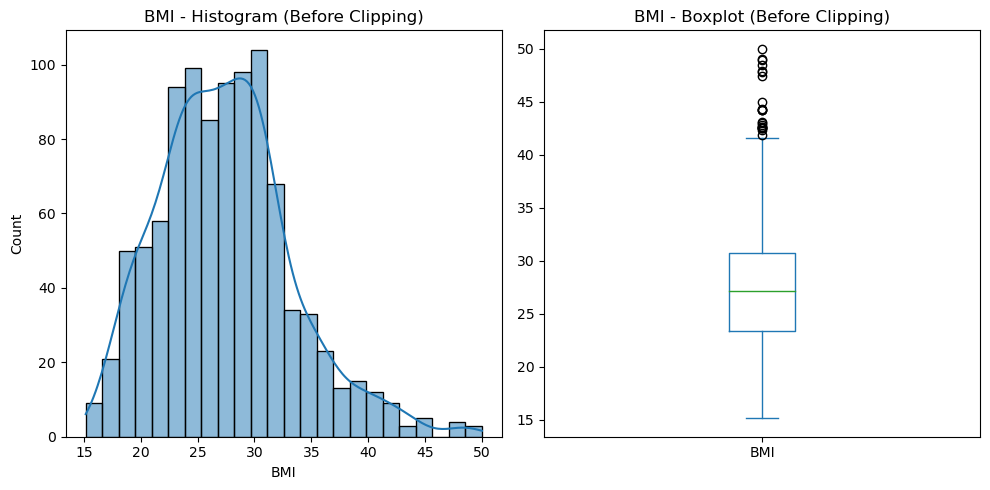

### 📊 Feature: `Weight`

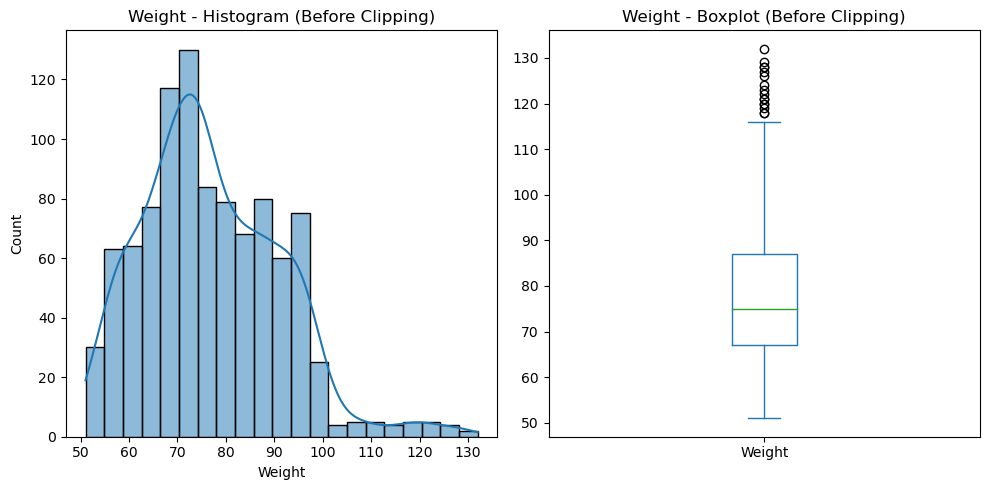

### 📊 Feature: `Height`

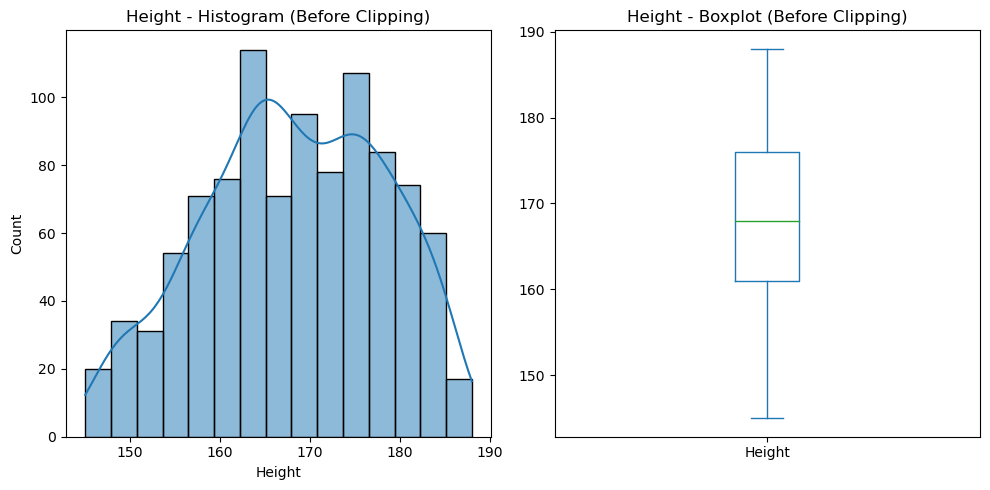

### 📊 Feature: `PremiumPrice`

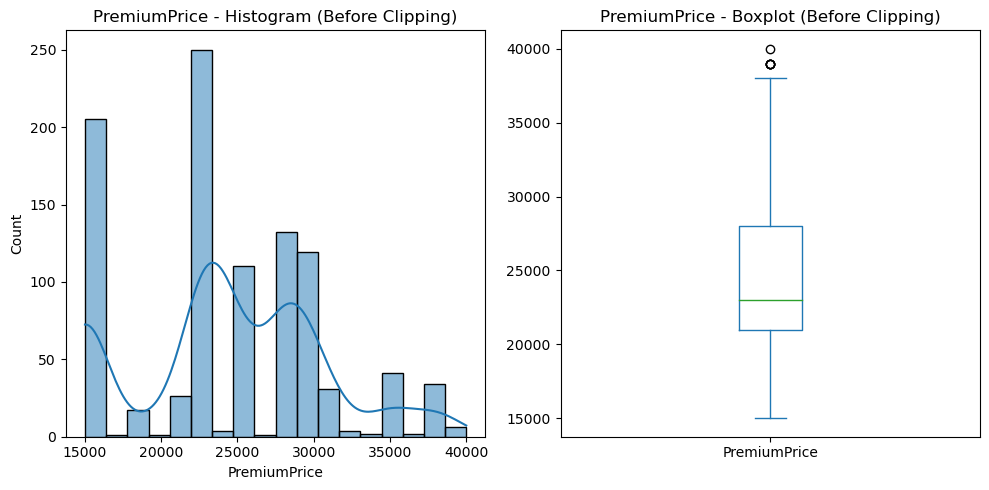

### 📊 Feature: `NumberOfMajorSurgeries`

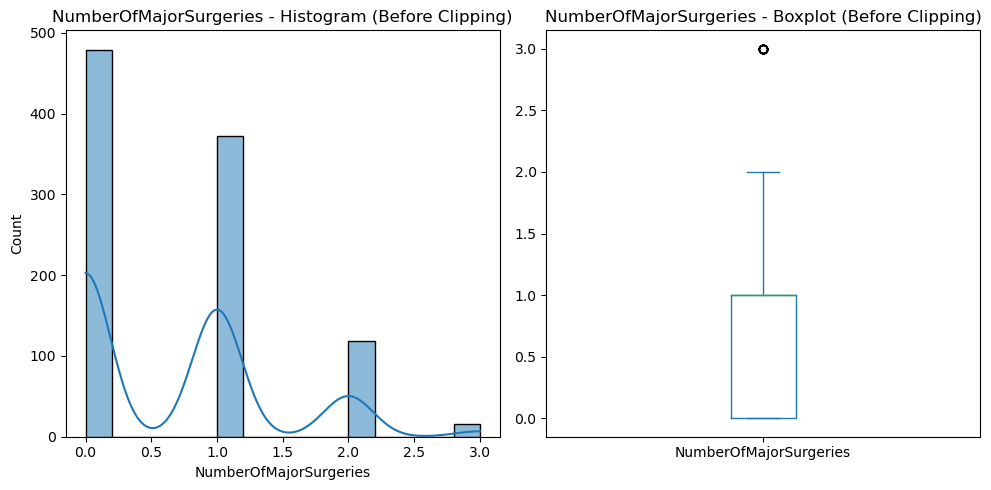

In [251]:
from scipy.stats import zscore
from IPython.display import display, Markdown

outlier_summary = []

for col in numerical_cols:
    display(Markdown(f"### 📊 Feature: `{col}`"))
    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Histogram (Before Clipping)")

    plt.subplot(1, 2, 2)
    df[col].plot.box()
    plt.title(f"{col} - Boxplot (Before Clipping)")
    plt.tight_layout()
    plt.show()
    
   

### 📊 Feature: `Age_clipped`

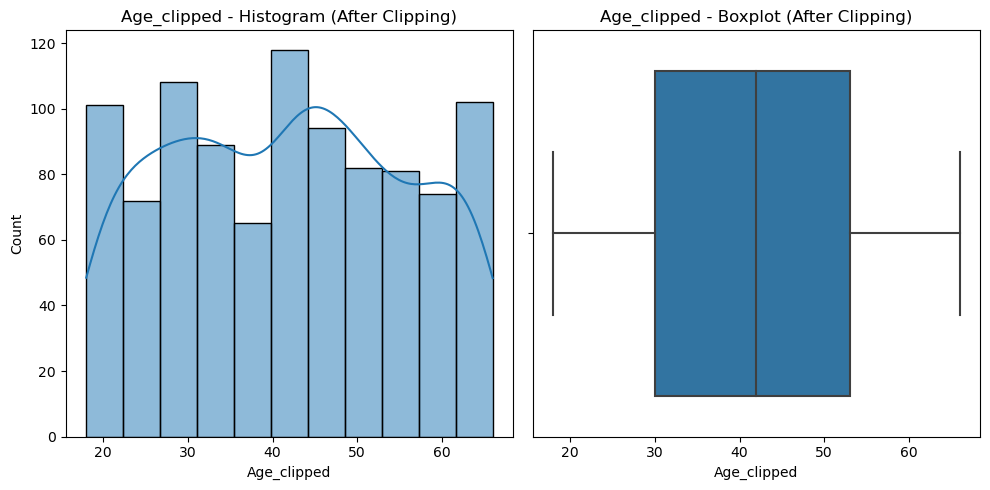

### 📊 Feature: `BMI_clipped`

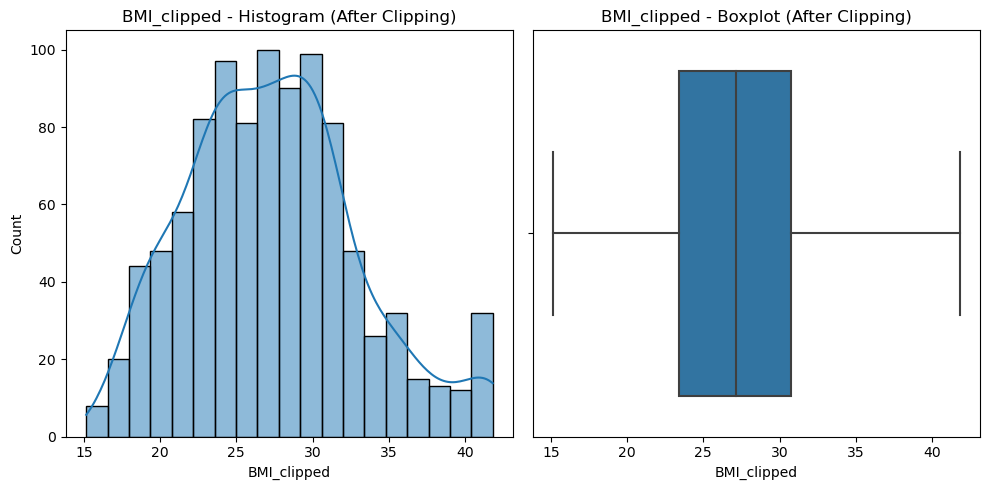

### 📊 Feature: `Weight_clipped`

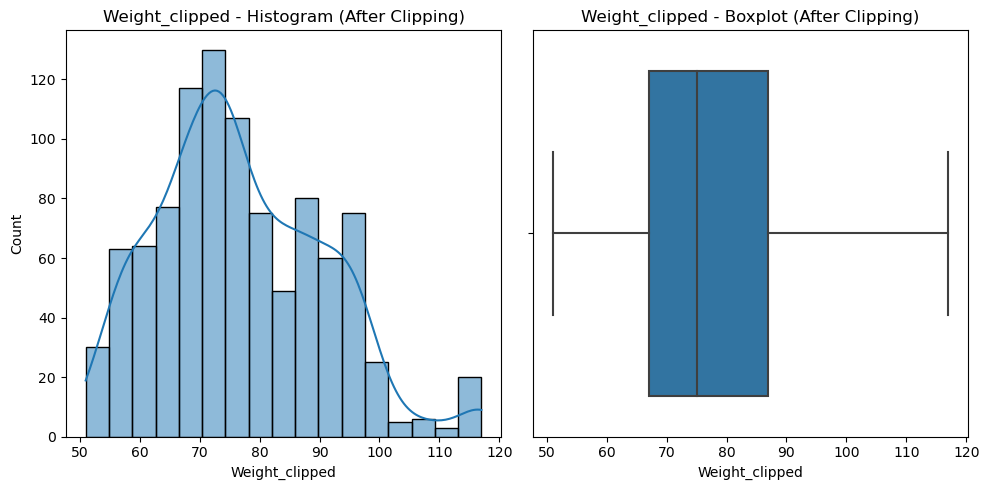

### 📊 Feature: `Height_clipped`

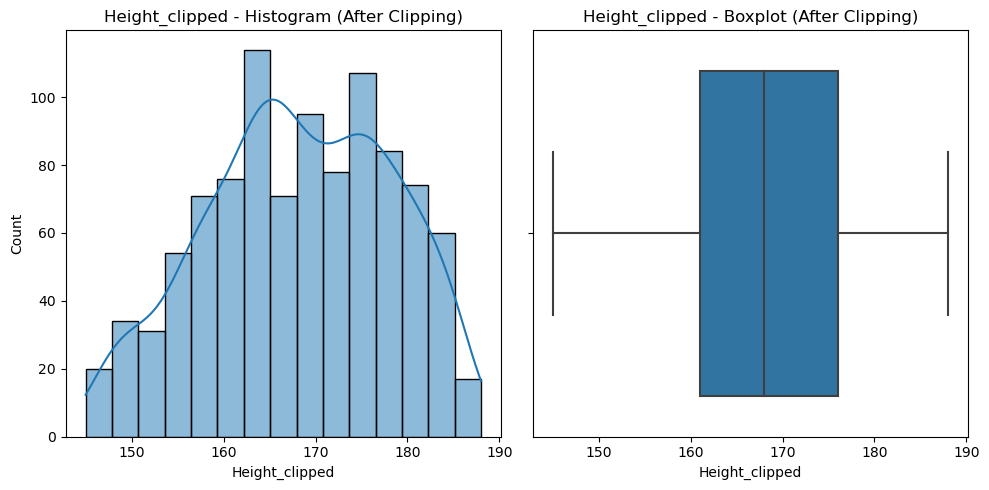

### 📊 Feature: `PremiumPrice_clipped`

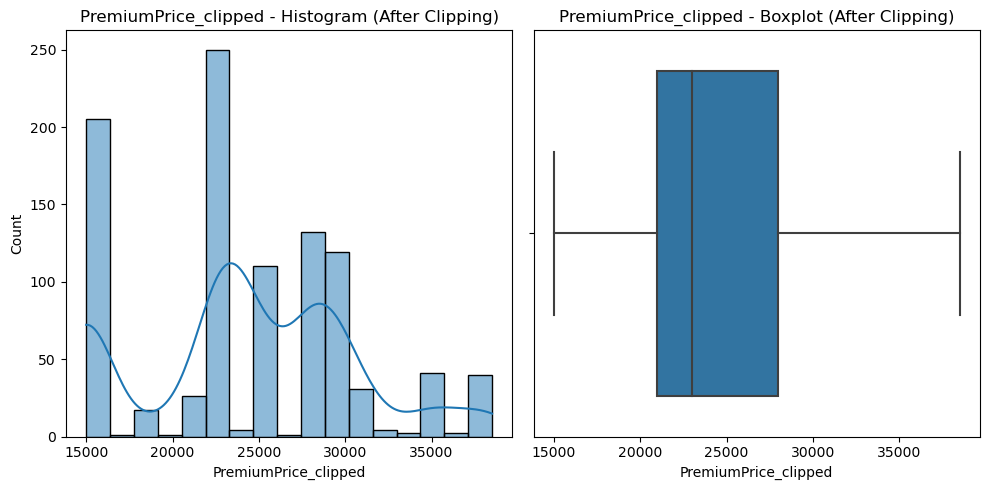

### 📊 Feature: `NumberOfMajorSurgeries_clipped`

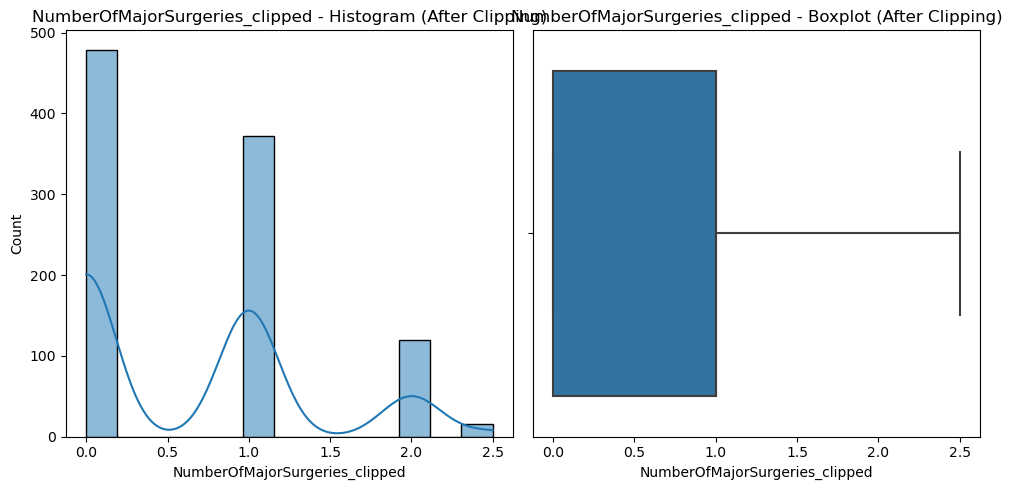

## 📋 Outlier Detection Summary

,Feature,IQR Lower Bound,IQR Upper Bound,IQR Outliers,Z-score Outliers
0,Age,-4.50,87.50,0,0
1,BMI,12.34,41.81,22,7
2,Weight,37.00,117.00,16,13
3,Height,138.50,198.50,0,0
4,PremiumPrice,10500.00,38500.00,6,0
5,NumberOfMajorSurgeries,-1.50,2.50,16,16


In [252]:
for col in numerical_cols:
    # IQR calculation
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Z-score method
    z_scores = zscore(df[col])
    z_outliers = df[(z_scores > 3) | (z_scores < -3)]

    # Clip values
    clipped_col = col + "_clipped"
    df[clipped_col] = df[col].clip(lower_bound, upper_bound)

    display(Markdown(f"### 📊 Feature: `{clipped_col}`"))
    # After clipping: Histogram
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[clipped_col], kde=True)
    plt.title(f"{clipped_col} - Histogram (After Clipping)")

    # After clipping: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[clipped_col])
    plt.title(f"{clipped_col} - Boxplot (After Clipping)")
    plt.tight_layout()
    plt.show()

    # Add summary row
    outlier_summary.append({
        "Feature": col,
        "IQR Lower Bound": round(lower_bound, 2),
        "IQR Upper Bound": round(upper_bound, 2),
        "IQR Outliers": len(iqr_outliers),
        "Z-score Outliers": len(z_outliers)
    })

# Convert to DataFrame and print
outlier_df = pd.DataFrame(outlier_summary)
display(Markdown("## 📋 Outlier Detection Summary"))
display(outlier_df)

In [253]:
def plot_before_clipping(df, col):
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Histogram (Before Clipping)")

    plt.subplot(1, 2, 2)
    df[col].plot.box(figsize=(15,5))
    plt.title(f"{col} - Boxplot (Before Clipping)")
    plt.tight_layout()
    plt.show()

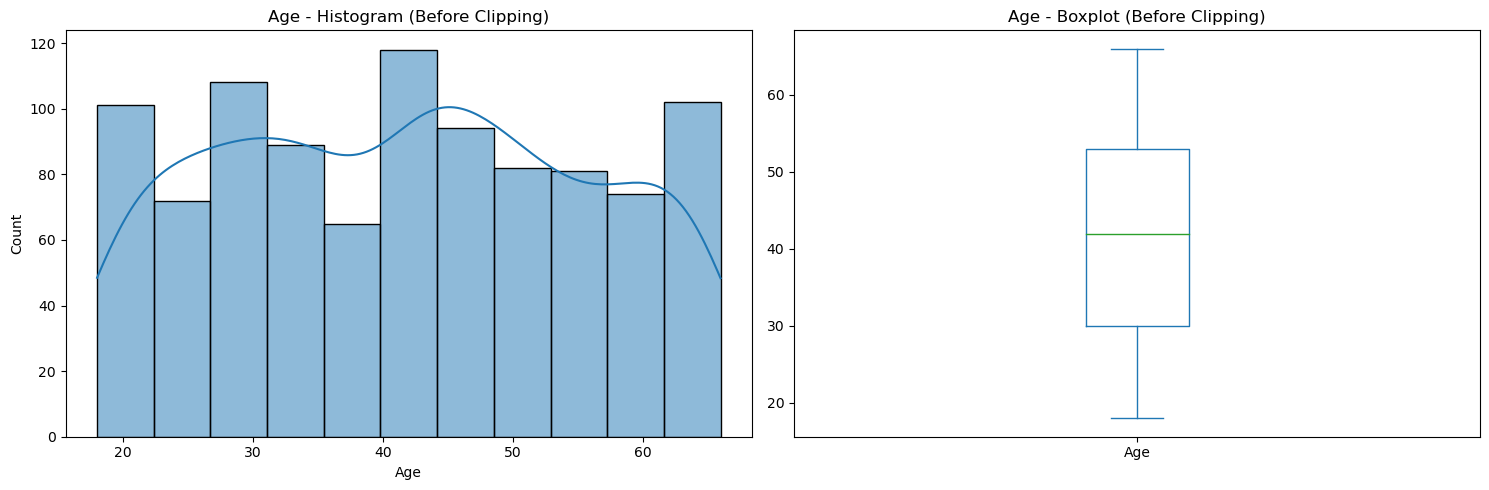

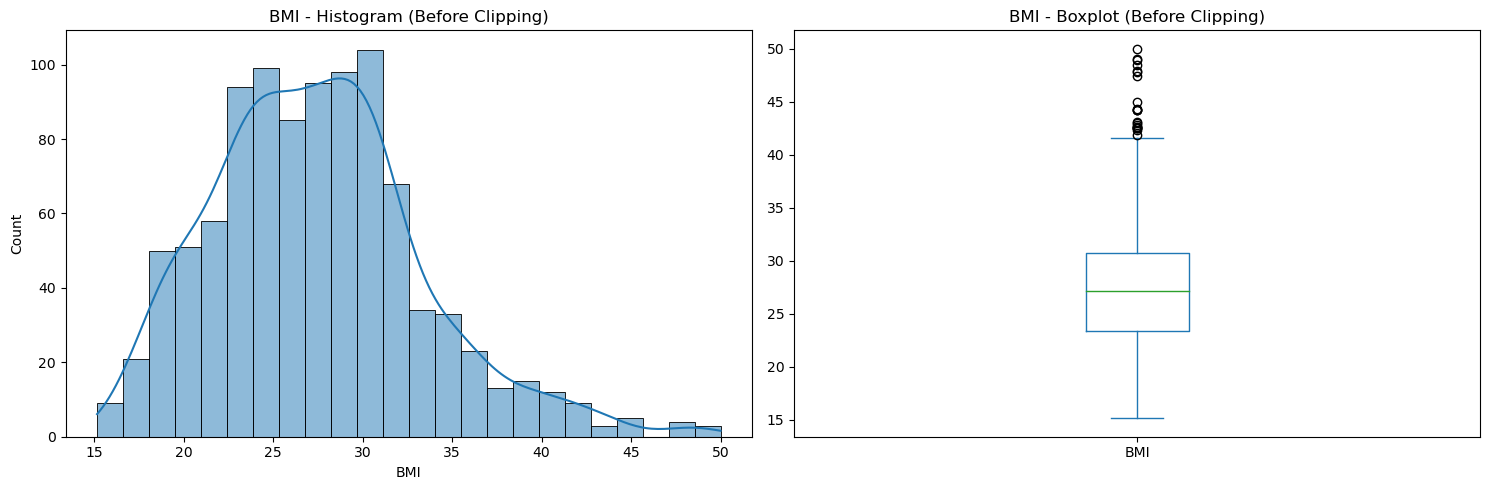

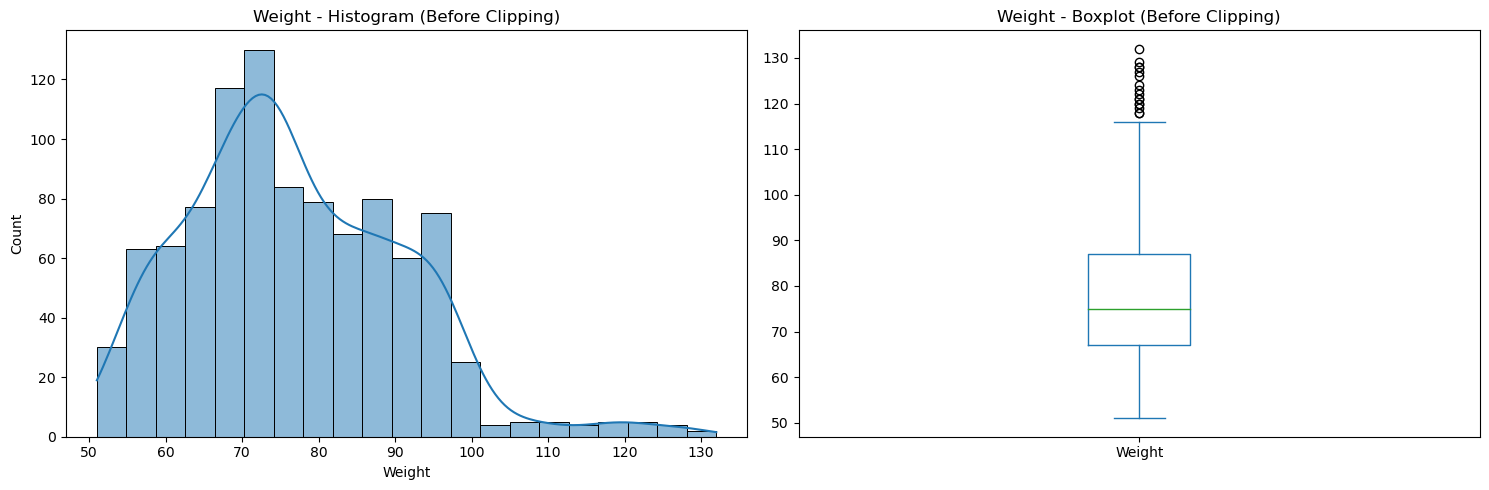

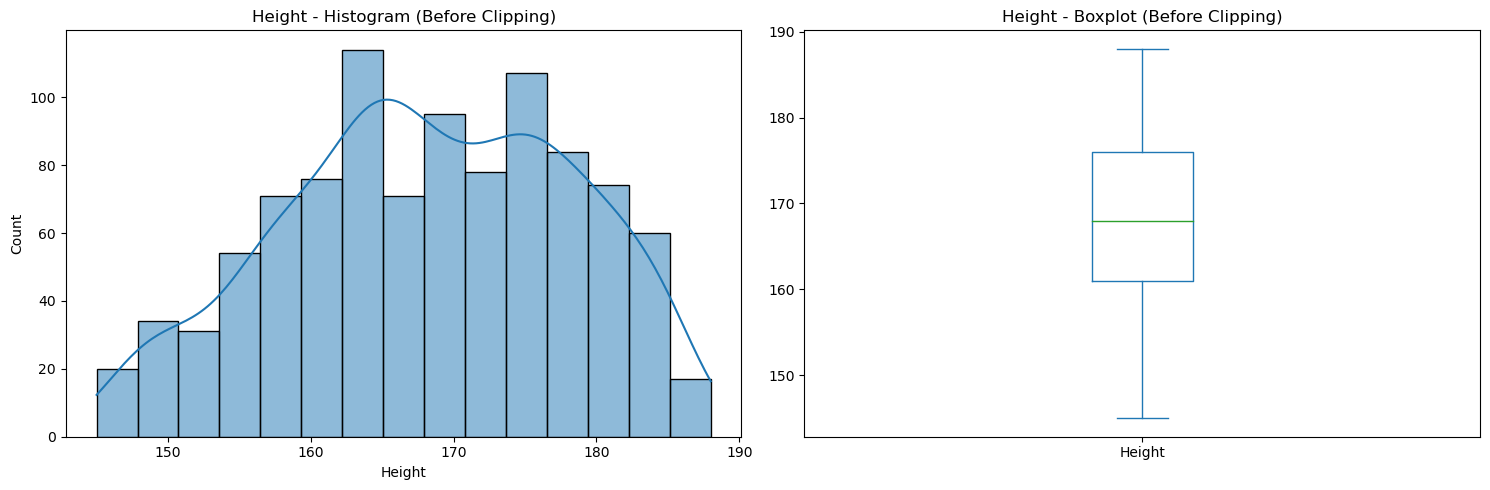

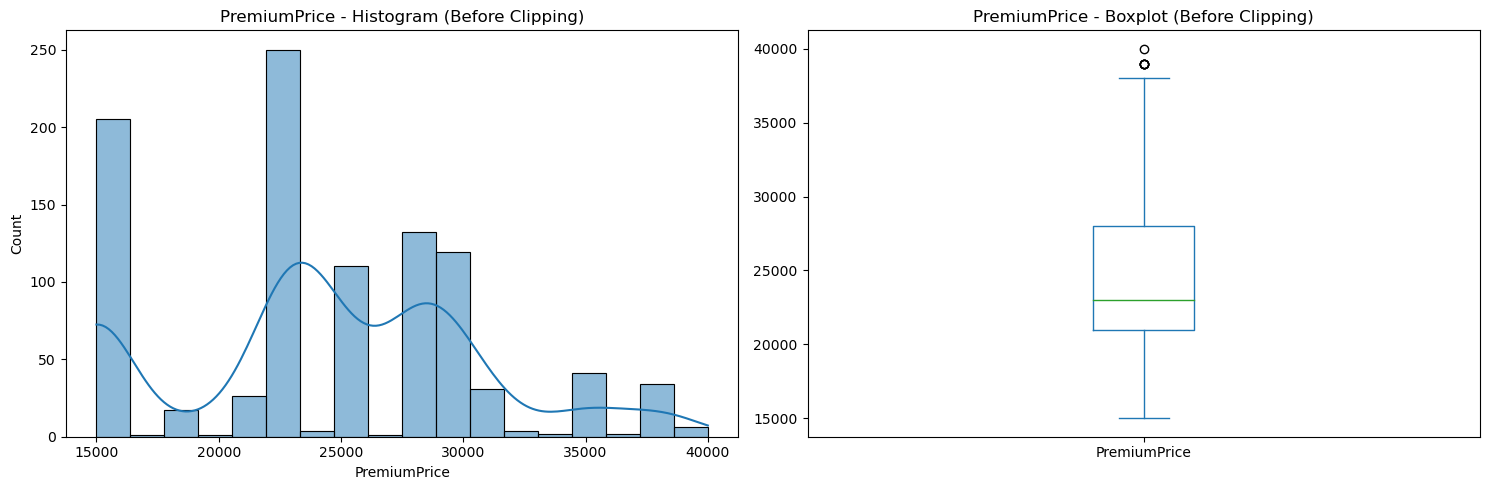

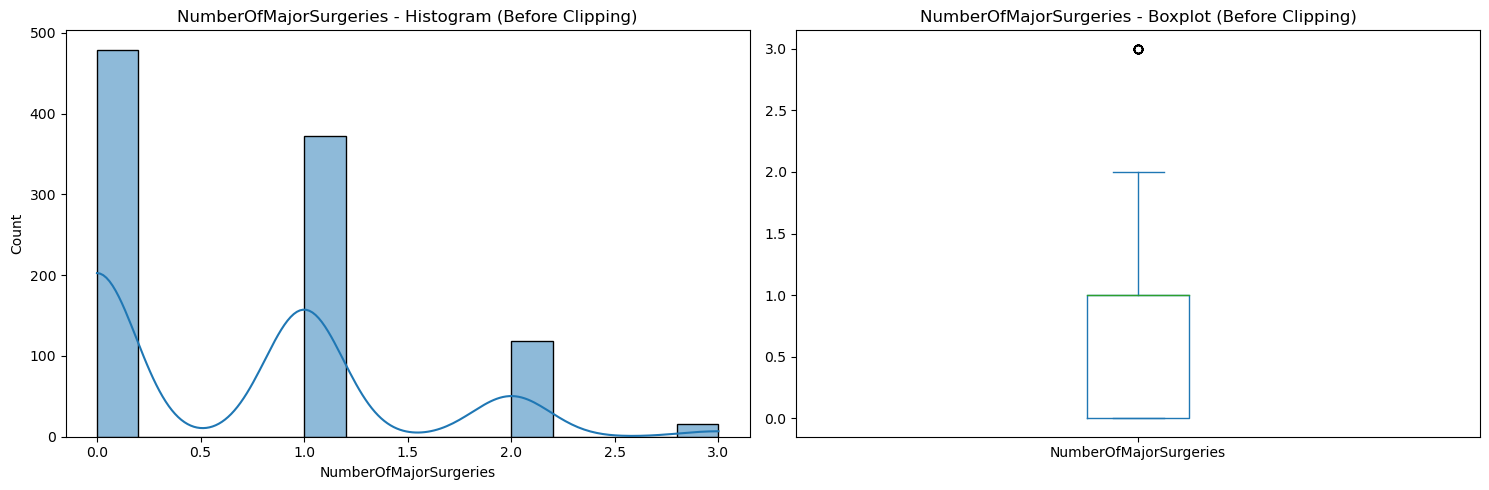

In [254]:
for col in numerical_cols:
    plot_before_clipping(df, col)

In [255]:

def calculate_iqr_outliers(df, col):  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    summary = {
        "Feature": col,
        "Q1": round(Q1, 2),
        "Q3": round(Q3, 2),
        "IQR": round(IQR, 2),
        "Lower Bound": round(lower, 2),
        "Upper Bound": round(upper, 2),
        "Outlier Count": len(outliers)
    }

    return summary, lower, upper


In [256]:
for col in numerical_cols:
    summary, lower, upper = calculate_iqr_outliers(df, col)
    print(summary)

{'Feature': 'Age', 'Q1': 30.0, 'Q3': 53.0, 'IQR': 23.0, 'Lower Bound': -4.5, 'Upper Bound': 87.5, 'Outlier Count': 0}
{'Feature': 'BMI', 'Q1': 23.39, 'Q3': 30.76, 'IQR': 7.37, 'Lower Bound': 12.34, 'Upper Bound': 41.81, 'Outlier Count': 22}
{'Feature': 'Weight', 'Q1': 67.0, 'Q3': 87.0, 'IQR': 20.0, 'Lower Bound': 37.0, 'Upper Bound': 117.0, 'Outlier Count': 16}
{'Feature': 'Height', 'Q1': 161.0, 'Q3': 176.0, 'IQR': 15.0, 'Lower Bound': 138.5, 'Upper Bound': 198.5, 'Outlier Count': 0}
{'Feature': 'PremiumPrice', 'Q1': 21000.0, 'Q3': 28000.0, 'IQR': 7000.0, 'Lower Bound': 10500.0, 'Upper Bound': 38500.0, 'Outlier Count': 6}
{'Feature': 'NumberOfMajorSurgeries', 'Q1': 0.0, 'Q3': 1.0, 'IQR': 1.0, 'Lower Bound': -1.5, 'Upper Bound': 2.5, 'Outlier Count': 16}


In [257]:
def clip_outliers(df, col, lower, upper):
    clipped_col = col + "_clipped"
    df[clipped_col] = df[col].clip(lower, upper)
    return df

In [258]:
def plot_after_clipping(df, col):
    clipped_col = col + "_clipped"

    plt.subplot(1, 2, 1)
    sns.histplot(df[clipped_col], kde=True)
    plt.title(f"{clipped_col} - Histogram (After Clipping)")

    plt.subplot(1, 2, 2)
    df[clipped_col].plot.box(figsize=(15,5))
    plt.title(f"{clipped_col} - Boxplot (After Clipping)")
    plt.tight_layout()
    plt.show()

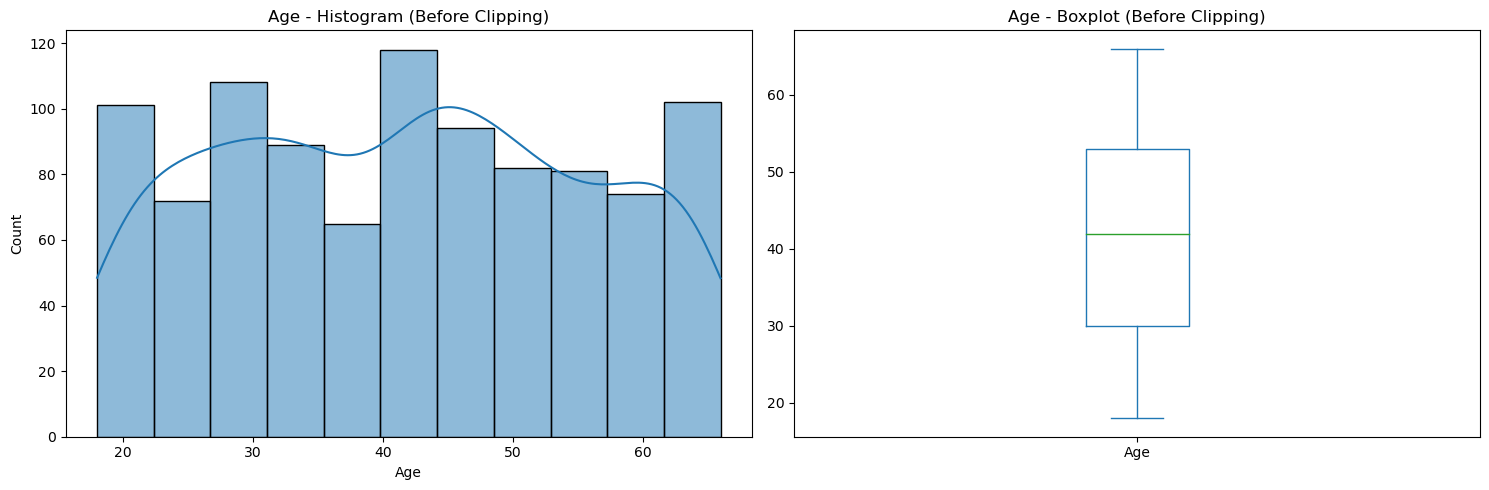

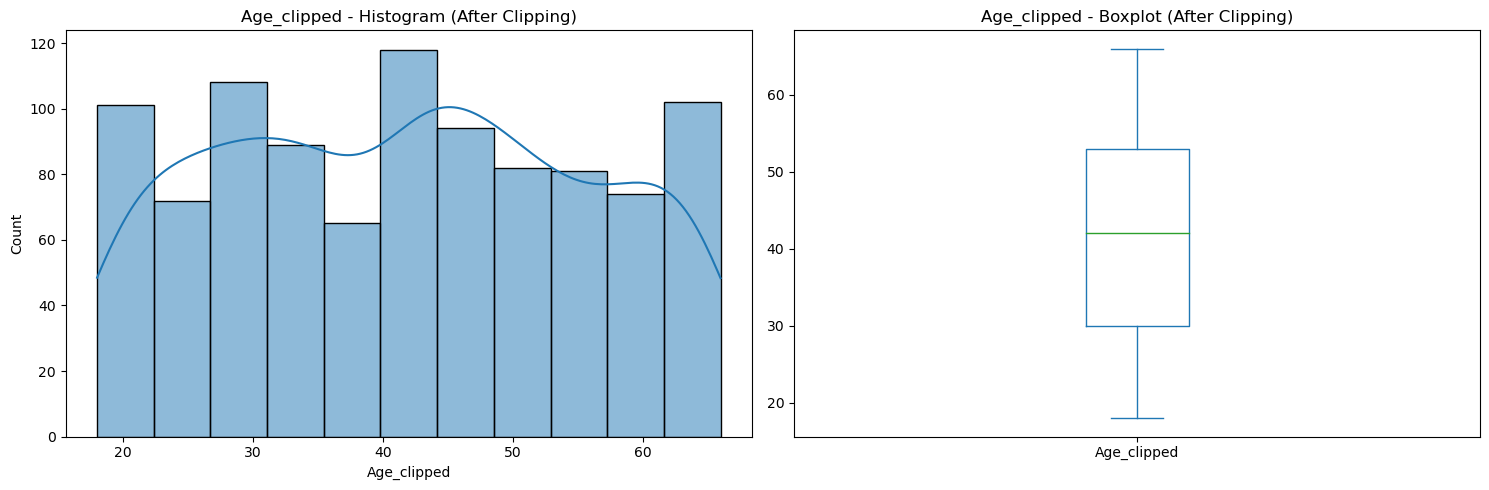

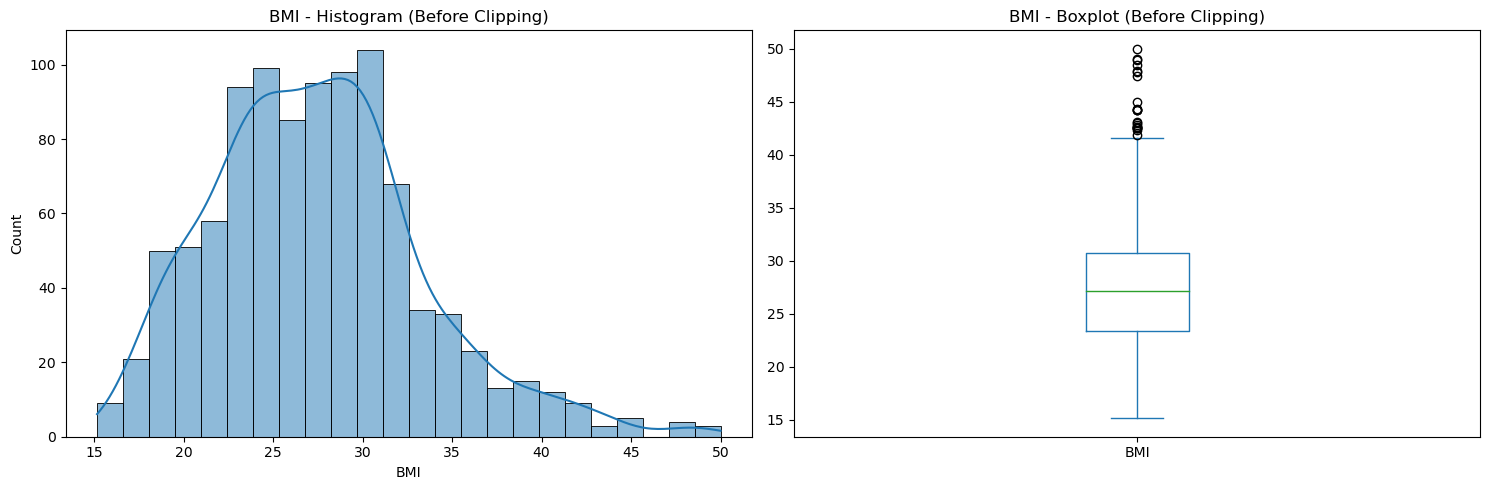

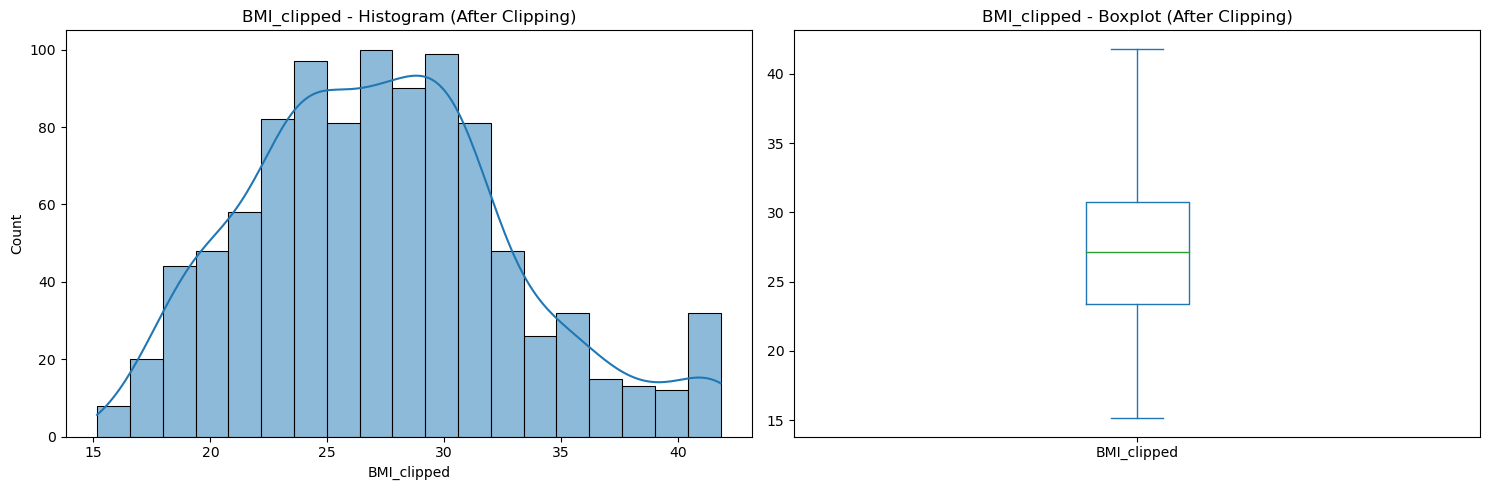

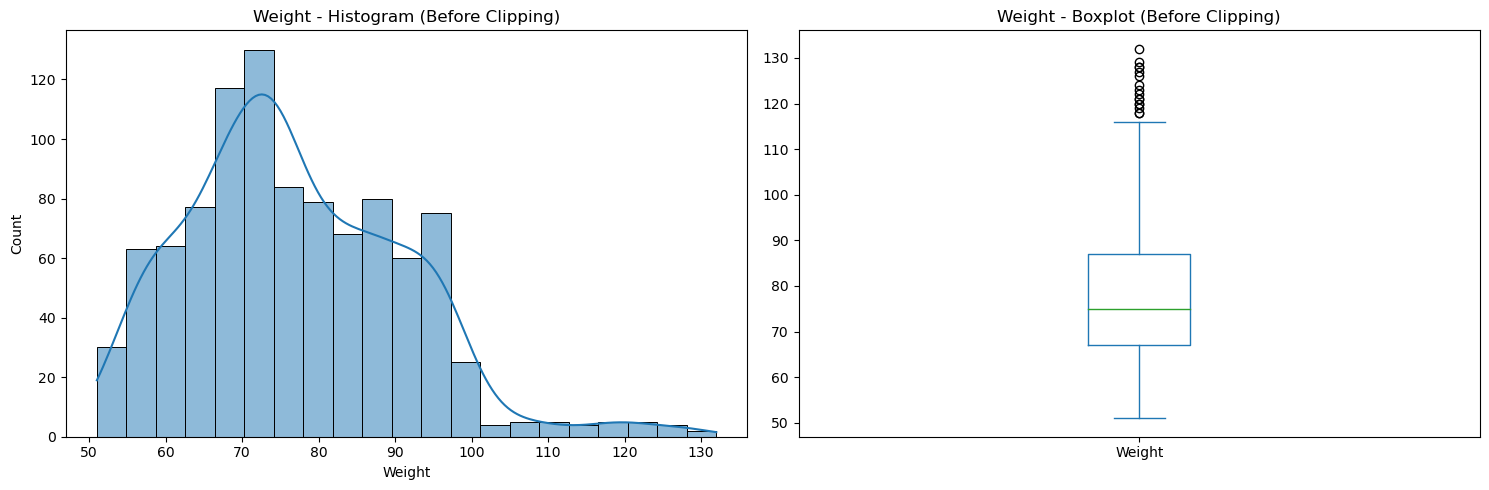

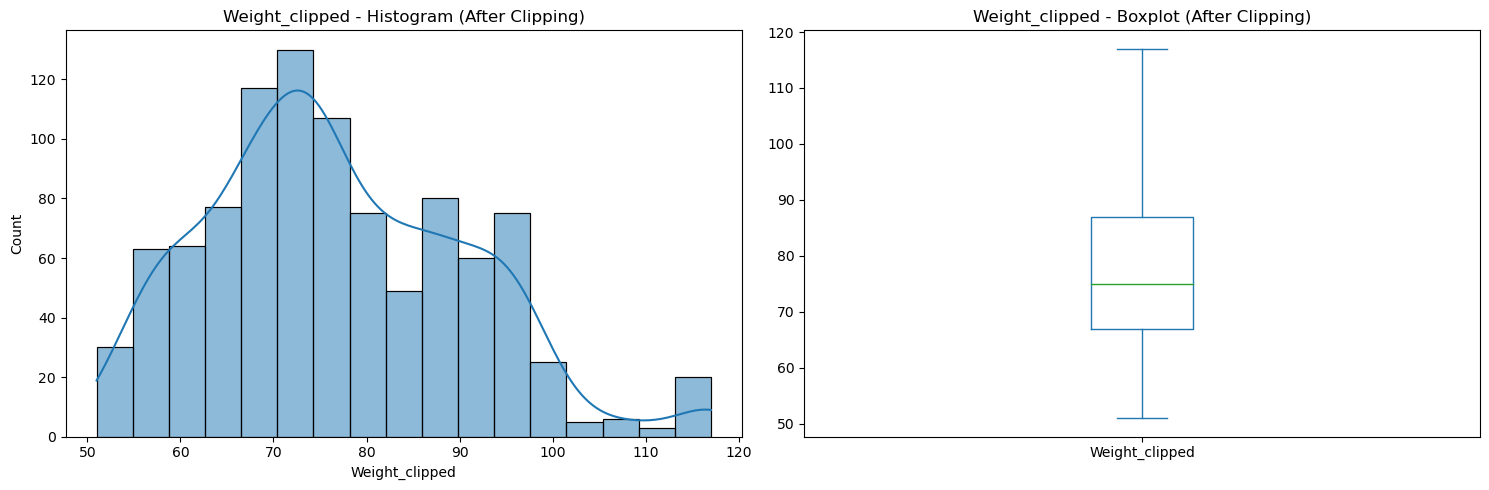

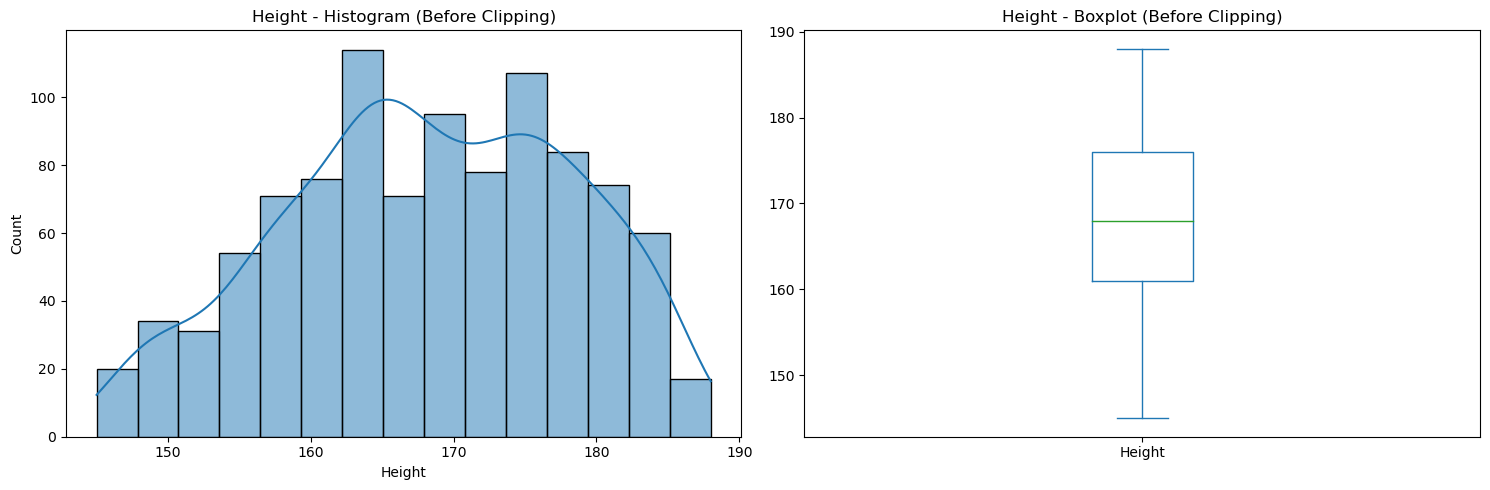

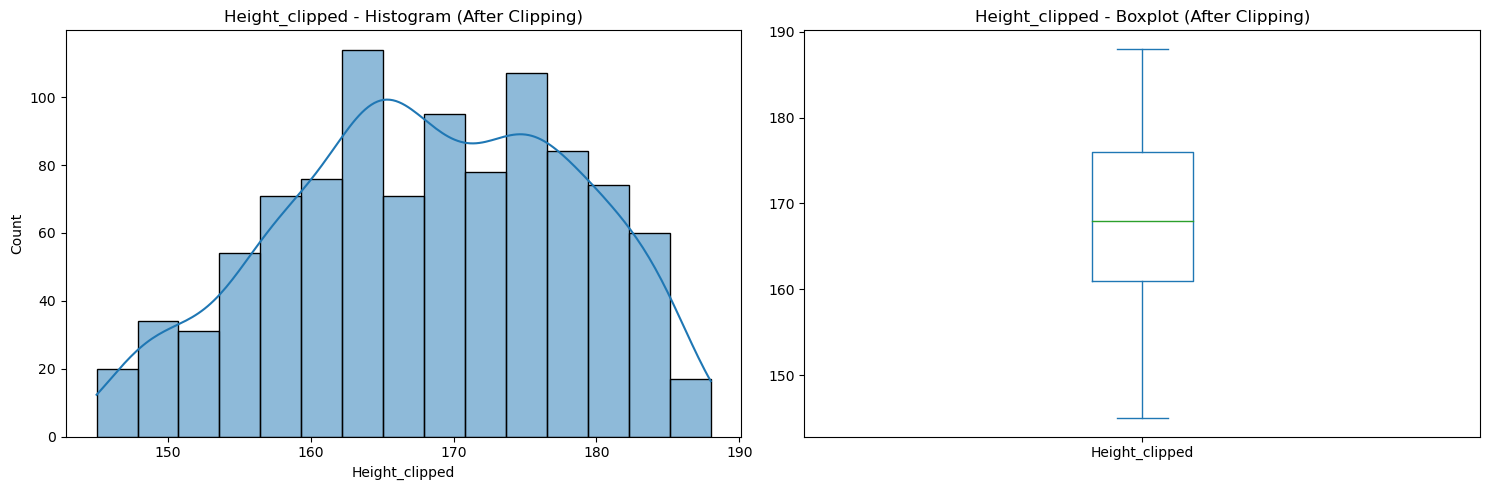

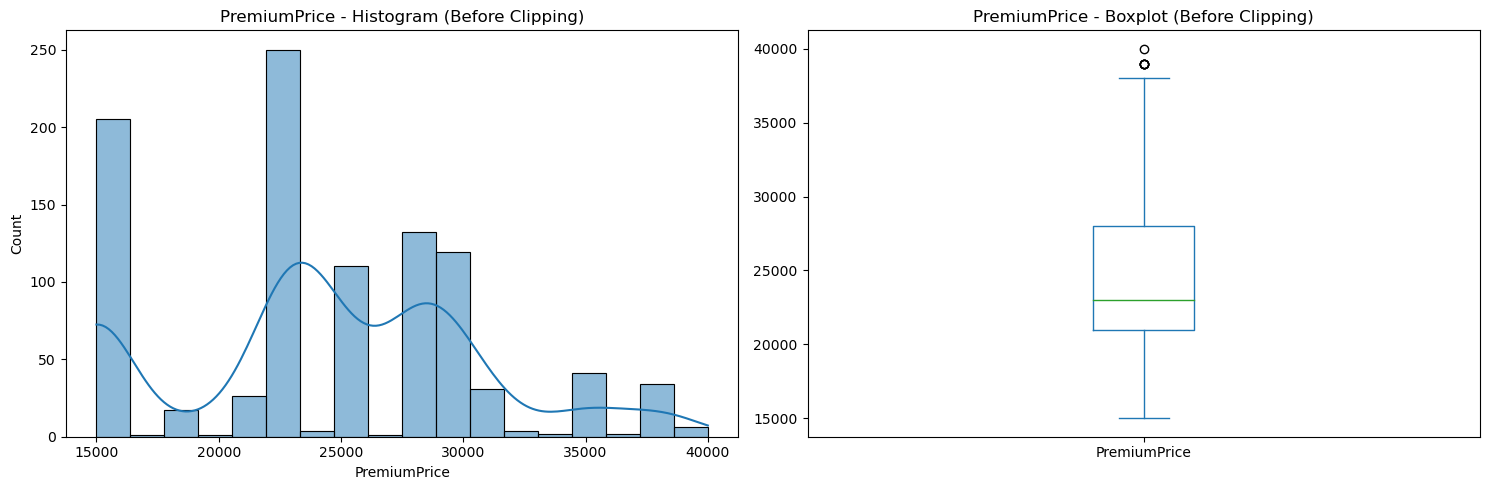

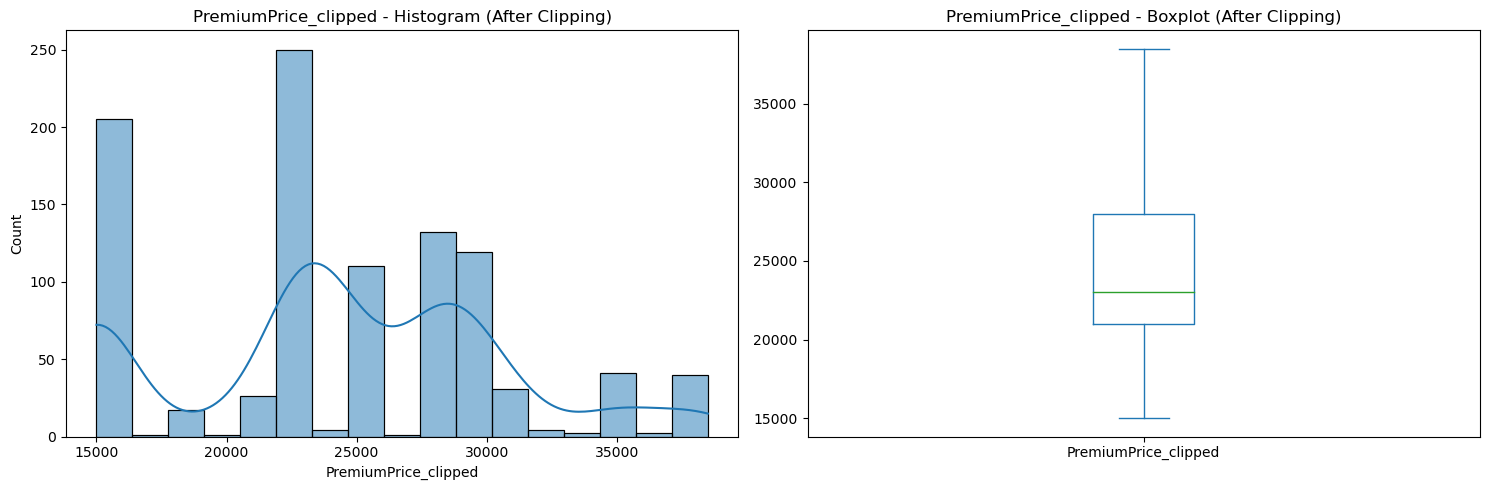

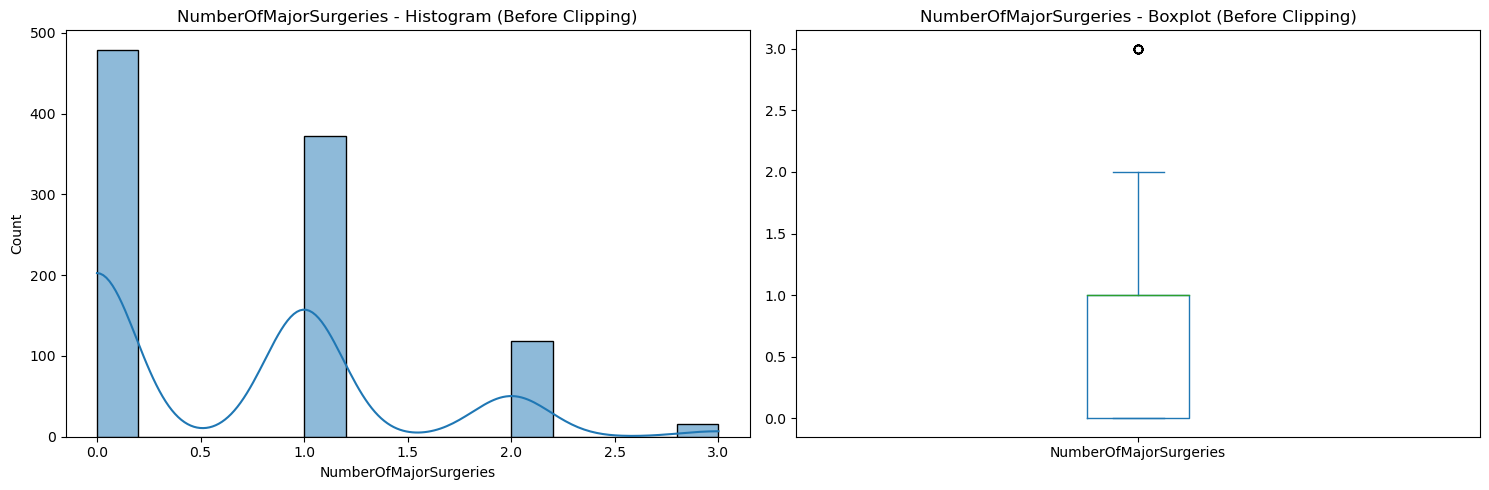

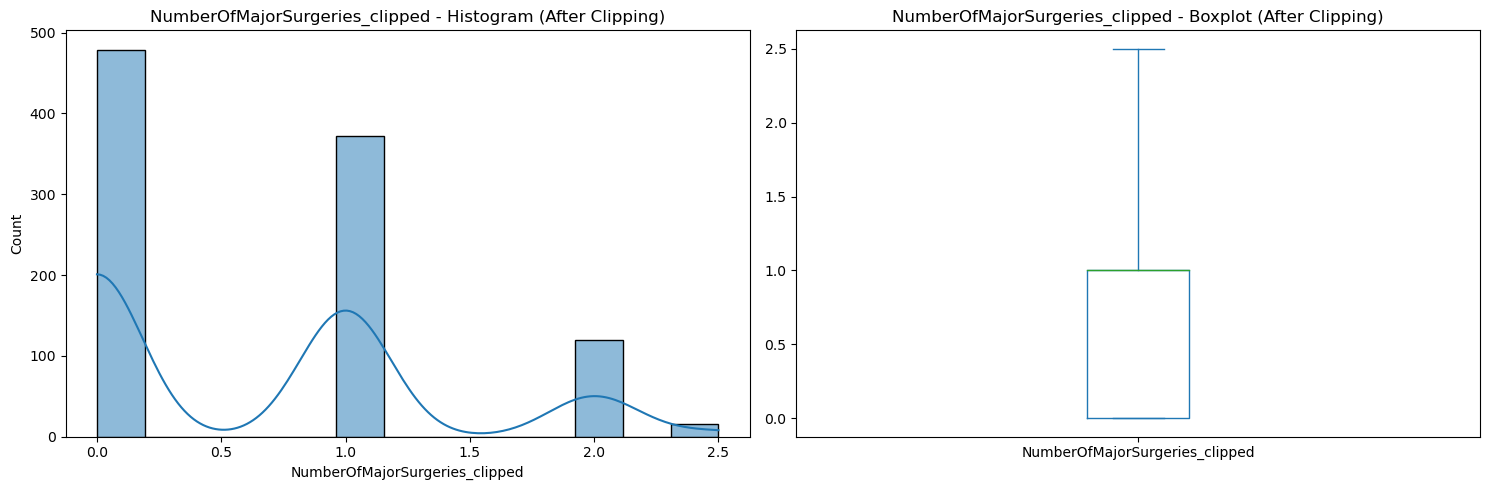

In [259]:
outlier_summary = []

for col in numerical_cols:
    plot_before_clipping(df, col)
    
    summary, lower, upper = calculate_iqr_outliers(df, col)
    outlier_summary.append(summary)
    
    df = clip_outliers(df, col, lower, upper)
    
    plot_after_clipping(df, col)


In [260]:
# Display summary
outlier_df = pd.DataFrame(outlier_summary)
display(Markdown("## 📋 Outlier Detection Summary"))
display(outlier_df)

## 📋 Outlier Detection Summary

,Feature,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,Age,30.00,53.00,23.00,-4.50,87.50,0
1,BMI,23.39,30.76,7.37,12.34,41.81,22
2,Weight,67.00,87.00,20.00,37.00,117.00,16
3,Height,161.00,176.00,15.00,138.50,198.50,0
4,PremiumPrice,21000.00,28000.00,7000.00,10500.00,38500.00,6
5,NumberOfMajorSurgeries,0.00,1.00,1.00,-1.50,2.50,16


In [261]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,BMI_Category,Age_Group,Health_Risk_Flag,Surgery_Severity,Age_clipped,BMI_clipped,Weight_clipped,Height_clipped,PremiumPrice_clipped,NumberOfMajorSurgeries_clipped
0,45,0,0,0,0,155,57,0,0,0,...,Normal,36–45,0,None,45,23.725286,57,155,25000,0.0
1,60,1,0,0,0,180,73,0,0,0,...,Normal,56–66,1,None,60,22.530864,73,180,29000,0.0
2,36,1,1,0,0,158,59,0,0,1,...,Normal,36–45,1,Mild,36,23.634033,59,158,23000,1.0
3,52,1,1,0,1,183,93,0,0,2,...,Overweight,46–55,1,Moderate,52,27.770313,93,183,28000,2.0
4,38,0,0,0,1,166,88,0,0,1,...,Obese,36–45,1,Mild,38,31.934969,88,166,23000,1.0


#### HYPOTHESIS TESTING

In [263]:
import scipy.stats as stats

#  T-TESTS: Binary health features vs PremiumPrice 
binary_features = [
    "Diabetes", "BloodPressureProblems", "AnyTransplants",
    "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily"
]

# Null Hypothesis : There is no significant difference in average PremiumPrice between groups with and without X.
# Alternate Hypothesis : There is a significant difference in average PremiumPrice between the groups.
hypothesis_results = []
for feature in binary_features:
    group0 = df[df[feature] == 0]["PremiumPrice"]
    group1 = df[df[feature] == 1]["PremiumPrice"]
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
    hypothesis_results.append({
        "Test": f"T-test: PremiumPrice ~ {feature}",
        "Test Statistic": round(t_stat, 3),
        "P-Value": round(p_val,4)
    })

In [264]:
hypothesis_results = pd.DataFrame(hypothesis_results)

display(Markdown("## 📋 Hypothesis Testing Summary"))
display(hypothesis_results)

## 📋 Hypothesis Testing Summary

,Test,Test Statistic,P-Value
0,T-test: PremiumPrice ~ Diabetes,-2.449,0.0145
1,T-test: PremiumPrice ~ BloodPressureProblems,-5.370,0.0000
2,T-test: PremiumPrice ~ AnyTransplants,-6.260,0.0000
3,T-test: PremiumPrice ~ AnyChronicDiseases,-7.708,0.0000
4,T-test: PremiumPrice ~ KnownAllergies,-0.367,0.7141
5,T-test: PremiumPrice ~ HistoryOfCancerInFamily,-2.357,0.0198


In [265]:
display(Markdown("Diabetes, BP problems, chronic diseases, transplants, and family cancer history are all significantly associated with higher/lower premiums."))
display(Markdown("These factors impact premium pricing"))
display(Markdown("Insurance providers likely consider them during risk calculation"))
display(Markdown("KnownAllergies: Has no significant effect on PremiumPrice in this dataset"))
display(Markdown("The high p-value (0.7141) means no statistical evidence of premium difference for allergy presence"))

Diabetes, BP problems, chronic diseases, transplants, and family cancer history are all significantly associated with higher/lower premiums.

These factors impact premium pricing

Insurance providers likely consider them during risk calculation

KnownAllergies: Has no significant effect on PremiumPrice in this dataset

The high p-value (0.7141) means no statistical evidence of premium difference for allergy presence

In [266]:
# ANOVA : Categorical Feature( >2 categories) Vs Premium Price

# Null Hypothesis : Mean PremiumPrice is the same across all groups.
# Alternate Hypothesis : At least one group has a different mean PremiumPrice.
anova_results = []

anova_features = [
    "Age_Group", "NumberOfMajorSurgeries",
    "BMI_Category", "Surgery_Severity"
]

for feature in anova_features:
    groups = [group["PremiumPrice"].values for _, group in df.groupby(feature)]
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results.append({
        "Feature": feature,
        "Test": f"ANOVA: PremiumPrice ~ {feature}",
        "F-Statistic": round(f_stat, 3),
        "P-Value": round(p_val, 4)
    })

anova_results = pd.DataFrame(anova_results)

display(Markdown("## 📋 Hypothesis Testing Summary"))
display(anova_results)

## 📋 Hypothesis Testing Summary

,Feature,Test,F-Statistic,P-Value
0,Age_Group,ANOVA: PremiumPrice ~ Age_Group,255.420,0.0000
1,NumberOfMajorSurgeries,ANOVA: PremiumPrice ~ NumberOfMajorSurgeries,26.135,0.0000
2,BMI_Category,ANOVA: PremiumPrice ~ BMI_Category,4.118,0.0065
3,Surgery_Severity,ANOVA: PremiumPrice ~ Surgery_Severity,26.135,0.0000


In [267]:
display(Markdown(" All tested features significantly influence insurance premium pricing."))
display(Markdown(" This validates that insurers are pricing based on measurable risk factors: age, chronic health, obesity, and surgical history."))

 All tested features significantly influence insurance premium pricing.

 This validates that insurers are pricing based on measurable risk factors: age, chronic health, obesity, and surgical history.

In [268]:
# Chi-square tests : association between two categorical variables

# Null Hypothesis : The two variables are independent.
# Alternate Hypothesis : The two variables are dependent.

chi2_results = []

chi2_pairs = [
    ("AnyChronicDiseases", "HistoryOfCancerInFamily"),
    ("Diabetes", "BloodPressureProblems"),
    ("AnyTransplants", "KnownAllergies"),
    ("BMI_Category", "NumberOfMajorSurgeries"),
    ("BMI_Category","Health_Risk_Flag")
]
for f1, f2 in chi2_pairs:
    ct = pd.crosstab(df[f1], df[f2])
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(ct)
    chi2_results.append({
        "Test": f"Chi-square: {f1} vs {f2}",
        "Stat": round(chi2_stat, 3),
        "P-Value": round(p_val, 4)
    })

chi2_results = pd.DataFrame(chi2_results)

display(Markdown("## 📋 Hypothesis Testing Summary"))
display(chi2_results)

## 📋 Hypothesis Testing Summary

,Test,Stat,P-Value
0,Chi-square: AnyChronicDiseases vs HistoryOfCan...,0.021,0.8858
1,Chi-square: Diabetes vs BloodPressureProblems,15.571,0.0001
2,Chi-square: AnyTransplants vs KnownAllergies,0.000,1.0000
3,Chi-square: BMI_Category vs NumberOfMajorSurge...,8.786,0.4573
4,Chi-square: BMI_Category vs Health_Risk_Flag,6.441,0.0920


In [269]:
display(Markdown("Among the tested pairs, only Diabetes and BloodPressureProblems show a statistically significant relationship."))
display(Markdown("Other combinations do not show evidence of dependence and may be treated as independent factors"))
display(Markdown("While the relationship between BMI Category and Health Risk Flag is not statistically significant (p = 0.092),With a larger dataset, this relationship might reach significance, indicating BMI's relevance to overall health risk classification."))

Among the tested pairs, only Diabetes and BloodPressureProblems show a statistically significant relationship.

Other combinations do not show evidence of dependence and may be treated as independent factors

While the relationship between BMI Category and Health Risk Flag is not statistically significant (p = 0.092),With a larger dataset, this relationship might reach significance, indicating BMI's relevance to overall health risk classification.

In [270]:
# Correlation Tests

# Null Hypothesis : There is no linear correlation between BMI and PremiumPrice
# Alternate Hypothesis : There is a linear correlation

corr_results = []
pearson_corr, p_val = stats.pearsonr(df["BMI"], df["PremiumPrice"])
corr_results.append({
    "Test": "Pearson Corr: PremiumPrice ~ BMI",
    "Stat": round(pearson_corr, 3),
    "P-Value": round(p_val, 4)
})

spearman_corr, p_val = stats.spearmanr(df["BMI"], df["PremiumPrice"])
corr_results.append({
    "Test": "Spearman Corr: PremiumPrice ~ BMI",
    "Stat": round(spearman_corr, 3),
    "P-Value": round(p_val, 4)
})

corr_results = pd.DataFrame(corr_results)

display(Markdown("## 📋 Hypothesis Testing Summary"))
display(corr_results)

## 📋 Hypothesis Testing Summary

,Test,Stat,P-Value
0,Pearson Corr: PremiumPrice ~ BMI,0.104,0.0011
1,Spearman Corr: PremiumPrice ~ BMI,0.098,0.0021


In [271]:
display(Markdown("There is a weak but statistically significant positive correlation between BMI and insurance premium price."))
display(Markdown("This means that as BMI increases, the premium tends to increase slightly, but not strongly."))

There is a weak but statistically significant positive correlation between BMI and insurance premium price.

This means that as BMI increases, the premium tends to increase slightly, but not strongly.

In [272]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,BMI_Category,Age_Group,Health_Risk_Flag,Surgery_Severity,Age_clipped,BMI_clipped,Weight_clipped,Height_clipped,PremiumPrice_clipped,NumberOfMajorSurgeries_clipped
0,45,0,0,0,0,155,57,0,0,0,...,Normal,36–45,0,None,45,23.725286,57,155,25000,0.0
1,60,1,0,0,0,180,73,0,0,0,...,Normal,56–66,1,None,60,22.530864,73,180,29000,0.0
2,36,1,1,0,0,158,59,0,0,1,...,Normal,36–45,1,Mild,36,23.634033,59,158,23000,1.0
3,52,1,1,0,1,183,93,0,0,2,...,Overweight,46–55,1,Moderate,52,27.770313,93,183,28000,2.0
4,38,0,0,0,1,166,88,0,0,1,...,Obese,36–45,1,Mild,38,31.934969,88,166,23000,1.0


In [273]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

predictors = [
    "Age", "BMI", "NumberOfMajorSurgeries", "Diabetes",
    "BloodPressureProblems", "AnyTransplants",
    "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily"
]
X = df[predictors]
y = df["PremiumPrice"]

X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     189.2
Date:                Thu, 22 May 2025   Prob (F-statistic):          4.73e-207
Time:                        13:45:47   Log-Likelihood:                -9518.5
No. Observations:                 986   AIC:                         1.906e+04
Df Residuals:                     976   BIC:                         1.911e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

R-squared: 0.6357

Significant Predictors (p-value < 0.05):
const                       1.808775e-16
Age                        6.323555e-163
BMI                         9.130730e-12
NumberOfMajorSurgeries      8.015562e-04
AnyTransplants              4.263269e-45
AnyChronicDiseases          8.302035e-17
HistoryOfCancerInFamily     4.228554e-09
dtype: float64

Regression Coefficients (Impact of each feature):
const                      5926.870251
Age                         330.512667
BMI                         142.322758
NumberOfMajorSurgeries     -631.544761
Diabetes                   -440.096851
BloodPressureProblems       110.462423
AnyTransplants             7819.866797
AnyChronicDiseases         2687.336789
KnownAllergies              306.691653
HistoryOfCancerInFamily    2306.654394
dtype: float64


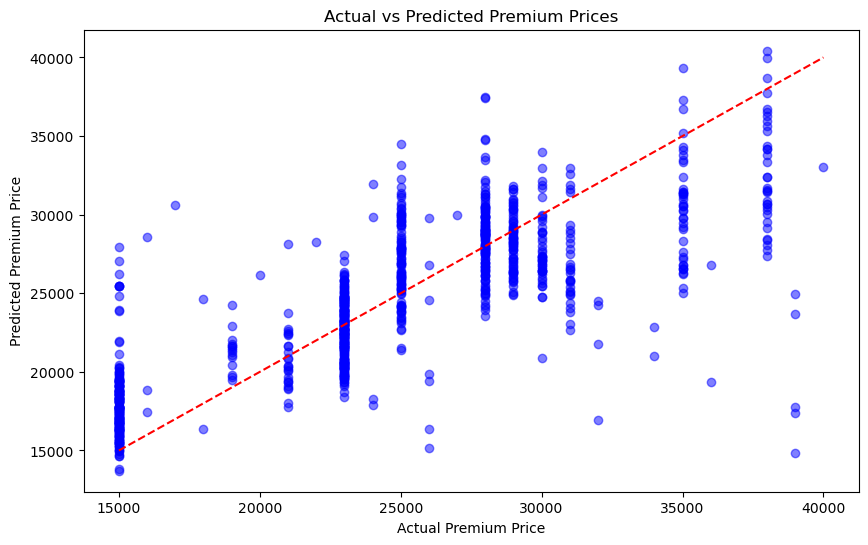

In [274]:
# Extract R-squared value for overall model performance
r_squared = model.rsquared
print(f"R-squared: {r_squared:.4f}")

# Check for significant predictors (p-values)
p_values = model.pvalues
significant_predictors = p_values[p_values < 0.05]  # Choose significance level at 0.05
print("\nSignificant Predictors (p-value < 0.05):")
print(significant_predictors)

# Display coefficients (Impact size for each feature)
coefficients = model.params
print("\nRegression Coefficients (Impact of each feature):")
print(coefficients)

# Optionally, plot actual vs. predicted PremiumPrice
import matplotlib.pyplot as plt

# Predictions
predictions = model.predict(X)

# Plotting actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Premium Price')
plt.ylabel('Predicted Premium Price')
plt.title('Actual vs Predicted Premium Prices')
plt.show()

In [275]:
display(Markdown("Age, BMI, chronic health conditions, and severe medical events (transplants, cancer history) are the strongest drivers of premium pricing."))
display(Markdown("Features like diabetes, blood pressure, and allergies do not individually influence premiums significantly when other variables are considered."))

Age, BMI, chronic health conditions, and severe medical events (transplants, cancer history) are the strongest drivers of premium pricing.

Features like diabetes, blood pressure, and allergies do not individually influence premiums significantly when other variables are considered.

In [276]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [277]:
xtrain, xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 2)

scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(xtrain)

# Prepare scaled input features for VIF
X_scaled = pd.DataFrame(xtrainscaled, columns=xtrain.columns)
X_scaled = sm.add_constant(X_scaled)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

                    Feature       VIF
4    NumberOfMajorSurgeries  1.385613
2                       Age  1.340682
6     BloodPressureProblems  1.111926
5                  Diabetes  1.085152
10  HistoryOfCancerInFamily  1.080085
9            KnownAllergies  1.035679
8        AnyChronicDiseases  1.020898
3                       BMI  1.014896
7            AnyTransplants  1.007809
0                     const  1.000000
1                     const       NaN


In [278]:
display(Markdown("There is no need to drop any features based on multicollinearity. All VIF values are well below 5, so no feature is linearly dependent on others."))

There is no need to drop any features based on multicollinearity. All VIF values are well below 5, so no feature is linearly dependent on others.

In [279]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,BMI_Category,Age_Group,Health_Risk_Flag,Surgery_Severity,Age_clipped,BMI_clipped,Weight_clipped,Height_clipped,PremiumPrice_clipped,NumberOfMajorSurgeries_clipped
0,45,0,0,0,0,155,57,0,0,0,...,Normal,36–45,0,None,45,23.725286,57,155,25000,0.0
1,60,1,0,0,0,180,73,0,0,0,...,Normal,56–66,1,None,60,22.530864,73,180,29000,0.0
2,36,1,1,0,0,158,59,0,0,1,...,Normal,36–45,1,Mild,36,23.634033,59,158,23000,1.0
3,52,1,1,0,1,183,93,0,0,2,...,Overweight,46–55,1,Moderate,52,27.770313,93,183,28000,2.0
4,38,0,0,0,1,166,88,0,0,1,...,Obese,36–45,1,Mild,38,31.934969,88,166,23000,1.0


Best Alpha: 6.5793
Test RMSE: 3537.17
Test R²: 0.7066


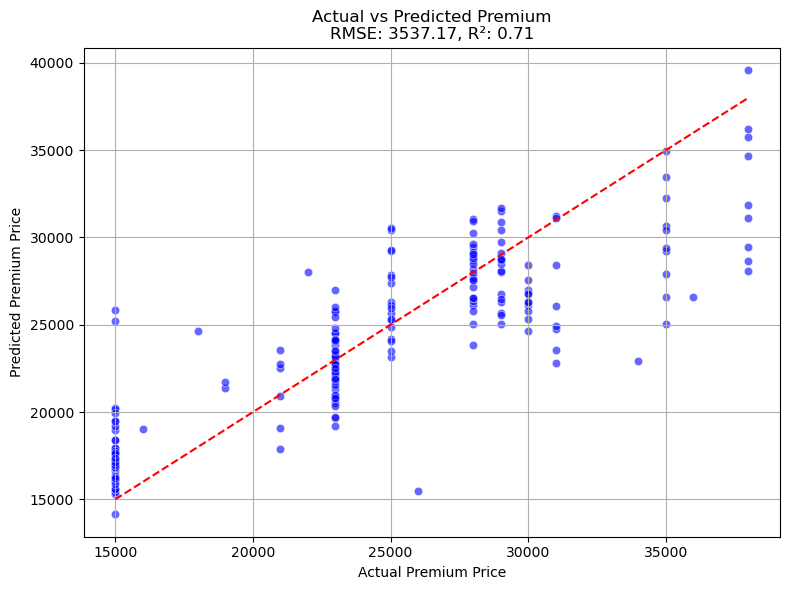

In [280]:
X = df[predictors]
y = df["PremiumPrice"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Fit Ridge Regression with cross-validation
ridge_model = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge_model.fit(X_train_scaled, y_train)

# 7. Predict and evaluate
y_pred = ridge_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 8. Print results
print(f"Best Alpha: {ridge_model.alpha_:.4f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")

# 9. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, edgecolor="w")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Premium Price")
plt.ylabel("Predicted Premium Price")
plt.title(f"Actual vs Predicted Premium\nRMSE: {rmse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [287]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, mean_squared_error

X = df[predictors]
y = df["PremiumPrice"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Random Forest and hyperparameters
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_scaled, y)

# Best estimator
best_rf = grid_search.best_estimator_

# Cross-validated metrics
cv_r2 = cross_val_score(best_rf, X_scaled, y, cv=5, scoring="r2")
cv_rmse = np.sqrt(-cross_val_score(best_rf, X_scaled, y, cv=5, scoring="neg_mean_squared_error"))

# Permutation importance
perm = permutation_importance(best_rf, X_scaled, y, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm.importances_mean
}).sort_values(by="Importance", ascending=False)

# Print summary
print("🔧 Best Hyperparameters:", grid_search.best_params_)
print(f"📈 Mean R² (CV): {np.mean(cv_r2):.4f}")
print(f"📉 Mean RMSE (CV): {np.mean(cv_rmse):.2f}")
print(f"🏆 Highest R² (from CV folds): {np.max(cv_r2):.4f}")
print("\n📊 Feature Importance:")
print(importance_df)

🔧 Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
📈 Mean R² (CV): 0.7407
📉 Mean RMSE (CV): 3135.25
🏆 Highest R² (from CV folds): 0.8592

📊 Feature Importance:
                   Feature  Importance
0                      Age    1.347427
5           AnyTransplants    0.243036
1                      BMI    0.187661
6       AnyChronicDiseases    0.113505
8  HistoryOfCancerInFamily    0.052810
2   NumberOfMajorSurgeries    0.048225
4    BloodPressureProblems    0.033352
3                 Diabetes    0.008990
7           KnownAllergies    0.004003


In [292]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5,
                         subsample=0.8, colsample_bytree=0.8,
                         objective="reg:squarederror", random_state=42)
xgb_r2 = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring="r2")
xgb_rmse = np.sqrt(-cross_val_score(xgb_model, X_scaled, y, cv=5, scoring="neg_mean_squared_error"))


In [294]:
# Summary
comparison = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Mean R²": [np.mean(cv_r2), np.mean(xgb_r2)],
    "Max R²": [np.max(cv_r2), np.max(xgb_r2)],
    "Mean RMSE": [np.mean(cv_rmse), np.mean(xgb_rmse)]
})

In [298]:
display(Markdown("## 📋 RF vs XGBoost Comparison"))
display(comparison)

## 📋 RF vs XGBoost Comparison

,Model,Mean R²,Max R²,Mean RMSE
0,Random Forest,0.740750,0.859181,3135.249194
1,XGBoost,0.732293,0.839210,3190.077372


In [301]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

base_estimators = [
    ("rf", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    ("xgb", XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5,
                         subsample=0.8, colsample_bytree=0.8,
                         objective="reg:squarederror", random_state=42))
]

# Final estimator
final_estimator = RidgeCV()

# Build and evaluate stacking model
stacking_model = StackingRegressor(estimators=base_estimators, final_estimator=final_estimator, cv=5)
cv_r2_stack = cross_val_score(stacking_model, X_scaled, y, cv=5, scoring="r2")
cv_rmse_stack = np.sqrt(-cross_val_score(stacking_model, X_scaled, y, cv=5, scoring="neg_mean_squared_error"))

# Output results
stacking_summary = {
    "Mean R² (CV)": np.mean(cv_r2_stack),
    "Max R² (CV)": np.max(cv_r2_stack),
    "Mean RMSE (CV)": np.mean(cv_rmse_stack)
}

stacking_summary

{'Mean R² (CV)': 0.7430442389199344,
 'Max R² (CV)': 0.8523724041923779,
 'Mean RMSE (CV)': 3122.9890595924658}

📌 Feature Importance (Random Forest)
Key predictors of insurance premium:

Age – Older individuals generally have higher premiums

BMI – Higher BMI correlates with higher premiums (obesity risks)

SevereCondition (chronic/transplant) – Major driver of cost increase

Surgery_Severity – History of surgery significantly impacts premium

Family cancer history & diabetes – Contribute, but less than the above

📍 Model Insights
Non-linear models (RF/XGB) handle the dataset better than linear models (R² ~0.71 for Ridge)

No significant multicollinearity (confirmed using VIF)

Feature engineering like BMI, Surgery_Severity, and SevereCondition added strong signal

Cross-validation ensured stability and robustness


In [305]:
import pickle
with open("premium_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)